### 0. Uploading and first look

In [1]:
import os
os.getcwd ()
os.chdir('C:\\Users\\AGarashzade\\Documents\\Personal\\ML_project_resid')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('train_set.csv')

In [10]:
df.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [11]:
df.describe()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,401.000000,...,246.0,246.000000,246.0,246.000000,246.000000,246.0,246.000000,246.0,129.000000,129.000000
mean,2842.487624,11.086634,0.136139,0.096535,0.069307,0.029703,0.014655,0.009298,-0.034796,0.021308,...,0.0,0.004065,0.0,0.004065,0.044715,0.0,0.016260,0.0,0.054264,0.007752
std,1816.408508,5.615904,0.343361,0.295689,0.254290,0.169977,1.010075,1.009019,1.025830,1.023827,...,0.0,0.063758,0.0,0.063758,0.207100,0.0,0.126732,0.0,0.227420,0.088045
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,1045.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-0.541696,-0.648900,-0.617907,-0.774677,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3002.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.076295,0.040316,-0.165682,-0.101517,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,4608.250000,16.000000,0.000000,0.000000,0.000000,0.000000,0.740064,0.729532,0.481251,0.683835,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,5615.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,...,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [13]:
df['Id'].nunique() #data is per id 

404

<AxesSubplot:xlabel='patient_age_quantile', ylabel='Count'>

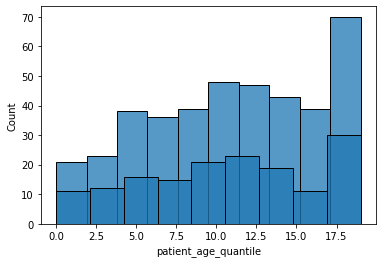

In [16]:
sns.histplot(data=df['patient_age_quantile'])
sns.histplot(data=df[df['adenovirus'].isna()]['patient_age_quantile'])

### 1. Analyzing the Nulls

In [24]:
#How many nulls in each column?

for i in df.columns:
    print(str(i) + ' ' + str(df[i].isna().sum()))

Id 0
patient_age_quantile 0
COVID 0
regular_ward 0
semi_intensive_unit 0
intensive_care_unit 0
hematocrit 0
hemoglobin 0
platelets 1
mean_platelet_volume 3
red_blood_cells 1
lymphocytes 1
mean_corpuscular_hemoglobin_concentration_mchc 1
leukocytes 1
basophils 1
mean_corpuscular_hemoglobin_mch 1
eosinophils 1
mean_corpuscular_volume_mcv 1
monocytes 2
red_blood_cell_distribution_width_rdw 1
respiratory_syncytial_virus 158
influenza_a 158
influenza_b 158
parainfluenza_1 158
coronavirusnl63 158
rhinovirus_enterovirus 158
coronavirus_hku1 158
parainfluenza_3 158
chlamydophila_pneumoniae 158
adenovirus 158
parainfluenza_4 158
coronavirus229e 158
coronavirusoc43 158
inf_a_h1n1_2009 158
bordetella_pertussis 158
metapneumovirus 158
parainfluenza_2 158
influenza_b_rapid_test 275
influenza_a_rapid_test 275


In [30]:
#are nulls coinciding in columns with 158 nulls?

df[df['adenovirus'].notna()]['parainfluenza_1'].value_counts()

0.0    246
Name: parainfluenza_1, dtype: int64

In [4]:
#are target variables correlated with NULLs?
 
df['Nulls'] = df['parainfluenza_4'].apply(lambda x: 1 if pd.isna(x) else 0)

In [37]:
df['Nulls'].sum()

158

In [69]:
a_1=[]
a_0=[]

target_variables=['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']
for i in target_variables:
    a_1.append(df[df['Nulls']==1][i].mean())

for i in target_variables:
    a_0.append(df[df['Nulls']==0][i].mean())

for_plot=pd.DataFrame(list(zip(target_variables, a_1,a_0)),columns=['Target_variable','Null','Not Null'])

In [70]:
for_plot

,Target_variable,Null,Not Null
0,COVID,0.132911,0.138211
1,regular_ward,0.025316,0.142276
2,semi_intensive_unit,0.031646,0.093496
3,intensive_care_unit,0.012658,0.040650


<AxesSubplot:xlabel='Target_variable'>

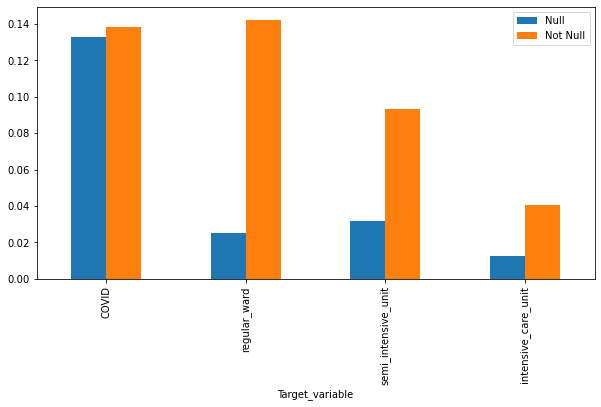

In [74]:
for_plot.plot(x='Target_variable',y=['Null','Not Null'],kind='bar',figsize=(10,5))

### 2. Analyzing the age percentile column

In [75]:
df.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test,Nulls
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1


Text(0.5, 1.0, 'Age is correlated with having Covid')

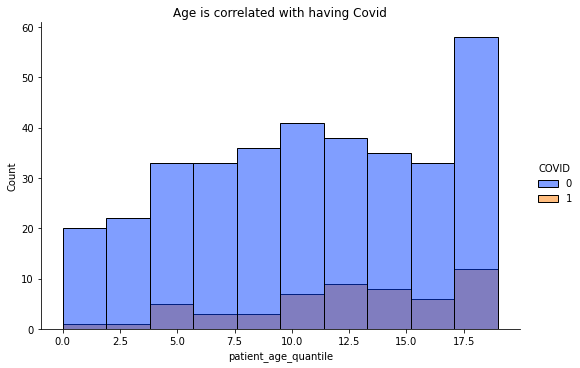

In [92]:
sns.displot(data=df,x='patient_age_quantile',hue='COVID',kind='hist',fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Age is correlated with having Covid')

In [94]:
df[df['patient_age_quantile']<10]['COVID'].mean()

0.08280254777070063

In [95]:
df[df['patient_age_quantile']>=10]['COVID'].mean()

0.1700404858299595

Text(0.5, 1.0, 'Age is correlated with being in regular ward')

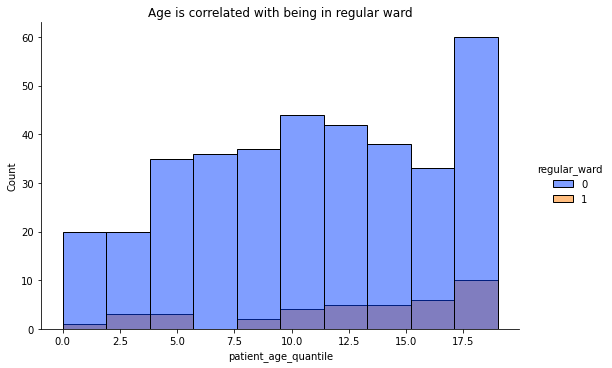

In [99]:
sns.displot(data=df,x='patient_age_quantile',hue='regular_ward',kind='hist',fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Age is correlated with being in regular ward')

In [97]:
df[df['patient_age_quantile']<10]['regular_ward'].mean()

0.05732484076433121

In [98]:
df[df['patient_age_quantile']>10]['regular_ward'].mean()

0.12173913043478261

Text(0.5, 1.0, 'Very high and very low age tends to be in semi intensive unit')

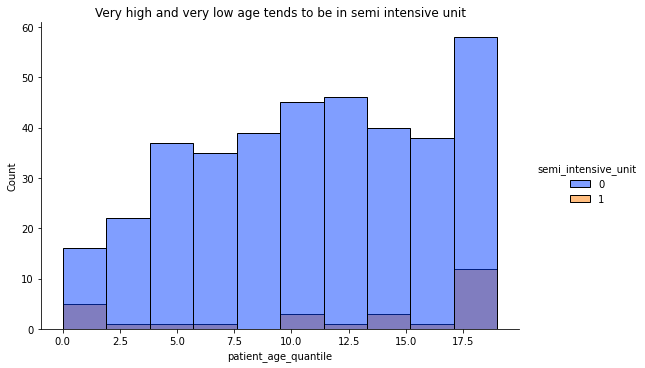

In [101]:
sns.displot(data=df,x='patient_age_quantile',hue='semi_intensive_unit',kind='hist',fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Very high and very low age tends to be in semi intensive unit')

Text(0.5, 1.0, 'Very high and very low age tends to be in intensive care unit')

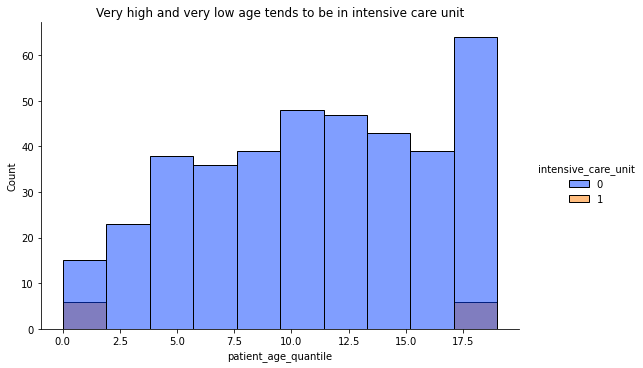

In [104]:
sns.displot(data=df,x='patient_age_quantile',hue='intensive_care_unit',kind='hist',fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Very high and very low age tends to be in intensive care unit')

In [5]:
df.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test,Nulls
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1


### 3. How does target variables interact with each other?


In [7]:

A=np.zeros((2,2))

In [11]:
A[0,0]=df[df['COVID']==0]['regular_ward'].sum()
A[0,1]=df[df['COVID']==0]['regular_ward'].count()-df[df['COVID']==0]['regular_ward'].sum()
A[1,0]=df[df['COVID']==1]['regular_ward'].sum()
A[1,1]=df[df['COVID']==1]['regular_ward'].count()-df[df['COVID']==1]['regular_ward'].sum()

In [13]:
A/df['COVID'].count()

#5% of the data is COVID = 0 and regular_ward=1
#81% of the data is COVID = 0 and regular_ward=0
#4% of the data is COVID = 1 and regular_ward = 1
#9% of the data is COVID = 1 and regular_ward = 0


array([[0.0519802 , 0.81188119],
       [0.04455446, 0.09158416]])

In [15]:
B=np.zeros((2,2))
B[0,0]=df[df['COVID']==0]['semi_intensive_unit'].sum()
B[0,1]=df[df['COVID']==0]['semi_intensive_unit'].count()-df[df['COVID']==0]['semi_intensive_unit'].sum()
B[1,0]=df[df['COVID']==1]['semi_intensive_unit'].sum()
B[1,1]=df[df['COVID']==1]['semi_intensive_unit'].count()-df[df['COVID']==1]['semi_intensive_unit'].sum()
B/df['COVID'].count()

#5% of the data is COVID = 0 and semi_intensive_unit=1
#81% of the data is COVID = 0 and semi_intensive_unit=0
#2% of the data is COVID = 1 and semi_intensive_unit = 1
#12% of the data is COVID = 1 and semi_intensive_unit = 0


array([[0.05445545, 0.80940594],
       [0.01485149, 0.12128713]])

In [22]:
C=np.zeros((2,2))
C[0,0]=df[df['COVID']==0]['intensive_care_unit'].sum()
C[0,1]=df[df['COVID']==0]['intensive_care_unit'].count()-df[df['COVID']==0]['intensive_care_unit'].sum()
C[1,0]=df[df['COVID']==1]['intensive_care_unit'].sum()
C[1,1]=df[df['COVID']==1]['intensive_care_unit'].count()-df[df['COVID']==1]['intensive_care_unit'].sum()
C/df['COVID'].count()

#2% of the data is COVID = 0 and intensive_care_unit=1
#84% of the data is COVID = 0 and intensive_care_unit=0
#0,5% of the data is COVID = 1 and intensive_care_unit = 1
#13% of the data is COVID = 1 and intensive_care_unit = 0


array([[0.02475248, 0.83910891],
       [0.0049505 , 0.13118812]])

In [25]:
D=np.zeros((2,2))
D[0,0]=df[df['regular_ward']==0]['semi_intensive_unit'].sum()
D[0,1]=df[df['regular_ward']==0]['semi_intensive_unit'].count()-df[df['regular_ward']==0]['semi_intensive_unit'].sum()
D[1,0]=df[df['regular_ward']==1]['semi_intensive_unit'].sum()
D[1,1]=df[df['regular_ward']==1]['semi_intensive_unit'].count()-df[df['regular_ward']==1]['semi_intensive_unit'].sum()
D/df['regular_ward'].count()

#7% of the data is regular_ward = 0 and semi_intensive_unit=1
#83% of the data is regular_ward = 0 and semi_intensive_unit=0
#0% of the data is regular_ward = 1 and semi_intensive_unit = 1
#10% of the data is regular_ward = 1 and semi_intensive_unit = 0

array([[0.06930693, 0.83415842],
       [0.        , 0.09653465]])

In [26]:
E=np.zeros((2,2))
E[0,0]=df[df['regular_ward']==0]['intensive_care_unit'].sum()
E[0,1]=df[df['regular_ward']==0]['intensive_care_unit'].count()-df[df['regular_ward']==0]['intensive_care_unit'].sum()
E[1,0]=df[df['regular_ward']==1]['intensive_care_unit'].sum()
E[1,1]=df[df['regular_ward']==1]['intensive_care_unit'].count()-df[df['regular_ward']==1]['intensive_care_unit'].sum()
E/df['regular_ward'].count()

#3% of the data is regular_ward = 0 and intensive_care_unit=1
#87% of the data is regular_ward = 0 and intensive_care_unit=0
#0% of the data is regular_ward = 1 and intensive_care_unit = 1
#10% of the data is regular_ward = 1 and intensive_care_unit = 0

array([[0.02970297, 0.87376238],
       [0.        , 0.09653465]])

In [27]:
F=np.zeros((2,2))
F[0,0]=df[df['semi_intensive_unit']==0]['intensive_care_unit'].sum()
F[0,1]=df[df['semi_intensive_unit']==0]['intensive_care_unit'].count()-df[df['semi_intensive_unit']==0]['intensive_care_unit'].sum()
F[1,0]=df[df['semi_intensive_unit']==1]['intensive_care_unit'].sum()
F[1,1]=df[df['semi_intensive_unit']==1]['intensive_care_unit'].count()-df[df['semi_intensive_unit']==1]['intensive_care_unit'].sum()
F/df['semi_intensive_unit'].count()

#3% of the data is semi_intensive_unit = 0 and intensive_care_unit=1
#87% of the data is semi_intensive_unit = 0 and intensive_care_unit=0
#0% of the data is semi_intensive_unit = 1 and intensive_care_unit = 1
#90% of the data is semi_intensive_unit = 1 and intensive_care_unit = 0

array([[0.02970297, 0.9009901 ],
       [0.        , 0.06930693]])

<AxesSubplot:>

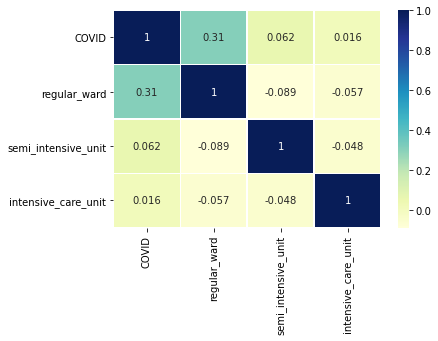

In [36]:
sns.heatmap(data=df[['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)


### 4. Blood test variables

#### These variables are available for almost every observation, so they should be the main features of the model: 

hematocrit,
hemoglobin,
platelets,
mean_platelet_volume,
red_blood_cells,
lymphocytes,
mean_corpuscular_hemoglobin_concentration_mchc,
leukocytes,
basophils,
mean_corpuscular_hemoglobin_mch,
eosinophils,
mean_corpuscular_volume_mcv,
monocytes,
red_blood_cell_distribution_width_rdw

#### Research shows that red blood count, hemoglobin, hematocrit should be correlated with COVID:

In summary, the present study has shown the CBCs of 208 mild and common COVID-19 cases and the most likely laboratory findings in these patients were abnormalities in RBCs, HGB, HCT, and CRP. Clinicians should consider these parameters when reading the CBC of COVID-19 patients.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7414516/

In [5]:
blood_variables_list=['hematocrit',
'hemoglobin',
'platelets',
'mean_platelet_volume',
'red_blood_cells',
'lymphocytes',
'mean_corpuscular_hemoglobin_concentration_mchc',
'leukocytes',
'basophils',
'mean_corpuscular_hemoglobin_mch',
'eosinophils',
'mean_corpuscular_volume_mcv',
'monocytes',
'red_blood_cell_distribution_width_rdw']

df[blood_variables_list].describe()

,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw
count,404.000000,404.000000,403.000000,401.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,402.000000,403.000000
mean,0.014655,0.009298,-0.034796,0.021308,0.003134,0.069627,-0.015545,-0.079005,0.037731,0.010205,0.004038,0.019027,0.002601,-0.005000
std,1.010075,1.009019,1.025830,1.023827,1.015078,1.006006,1.022547,0.924265,1.046191,0.971230,0.941643,0.961166,1.016444,1.022911
min,-4.501420,-4.345603,-2.552426,-2.457575,-3.970608,-1.865070,-4.535603,-2.020303,-1.140144,-5.519430,-0.835508,-4.941344,-2.084932,-1.598094
25%,-0.541696,-0.648900,-0.617907,-0.774677,-0.567950,-0.671003,-0.602266,-0.658126,-0.529226,-0.501356,-0.666950,-0.514813,-0.640455,-0.625073
50%,0.076295,0.040316,-0.165682,-0.101517,0.049113,0.028378,-0.054585,-0.269926,-0.223767,0.125903,-0.287696,0.066045,-0.115191,-0.182790
75%,0.740064,0.729532,0.481251,0.683835,0.683806,0.676585,0.642463,0.350636,0.387152,0.596348,0.344395,0.636887,0.534823,0.259492
max,2.662704,2.671868,9.532034,3.713052,3.645706,3.764100,3.331071,4.455255,11.078219,4.098546,4.221218,3.410980,4.533397,6.982184


In [6]:
#There are couple of rows with NULLs, we fill with average
df[blood_variables_list]=df[blood_variables_list].fillna(df[blood_variables_list].mean())

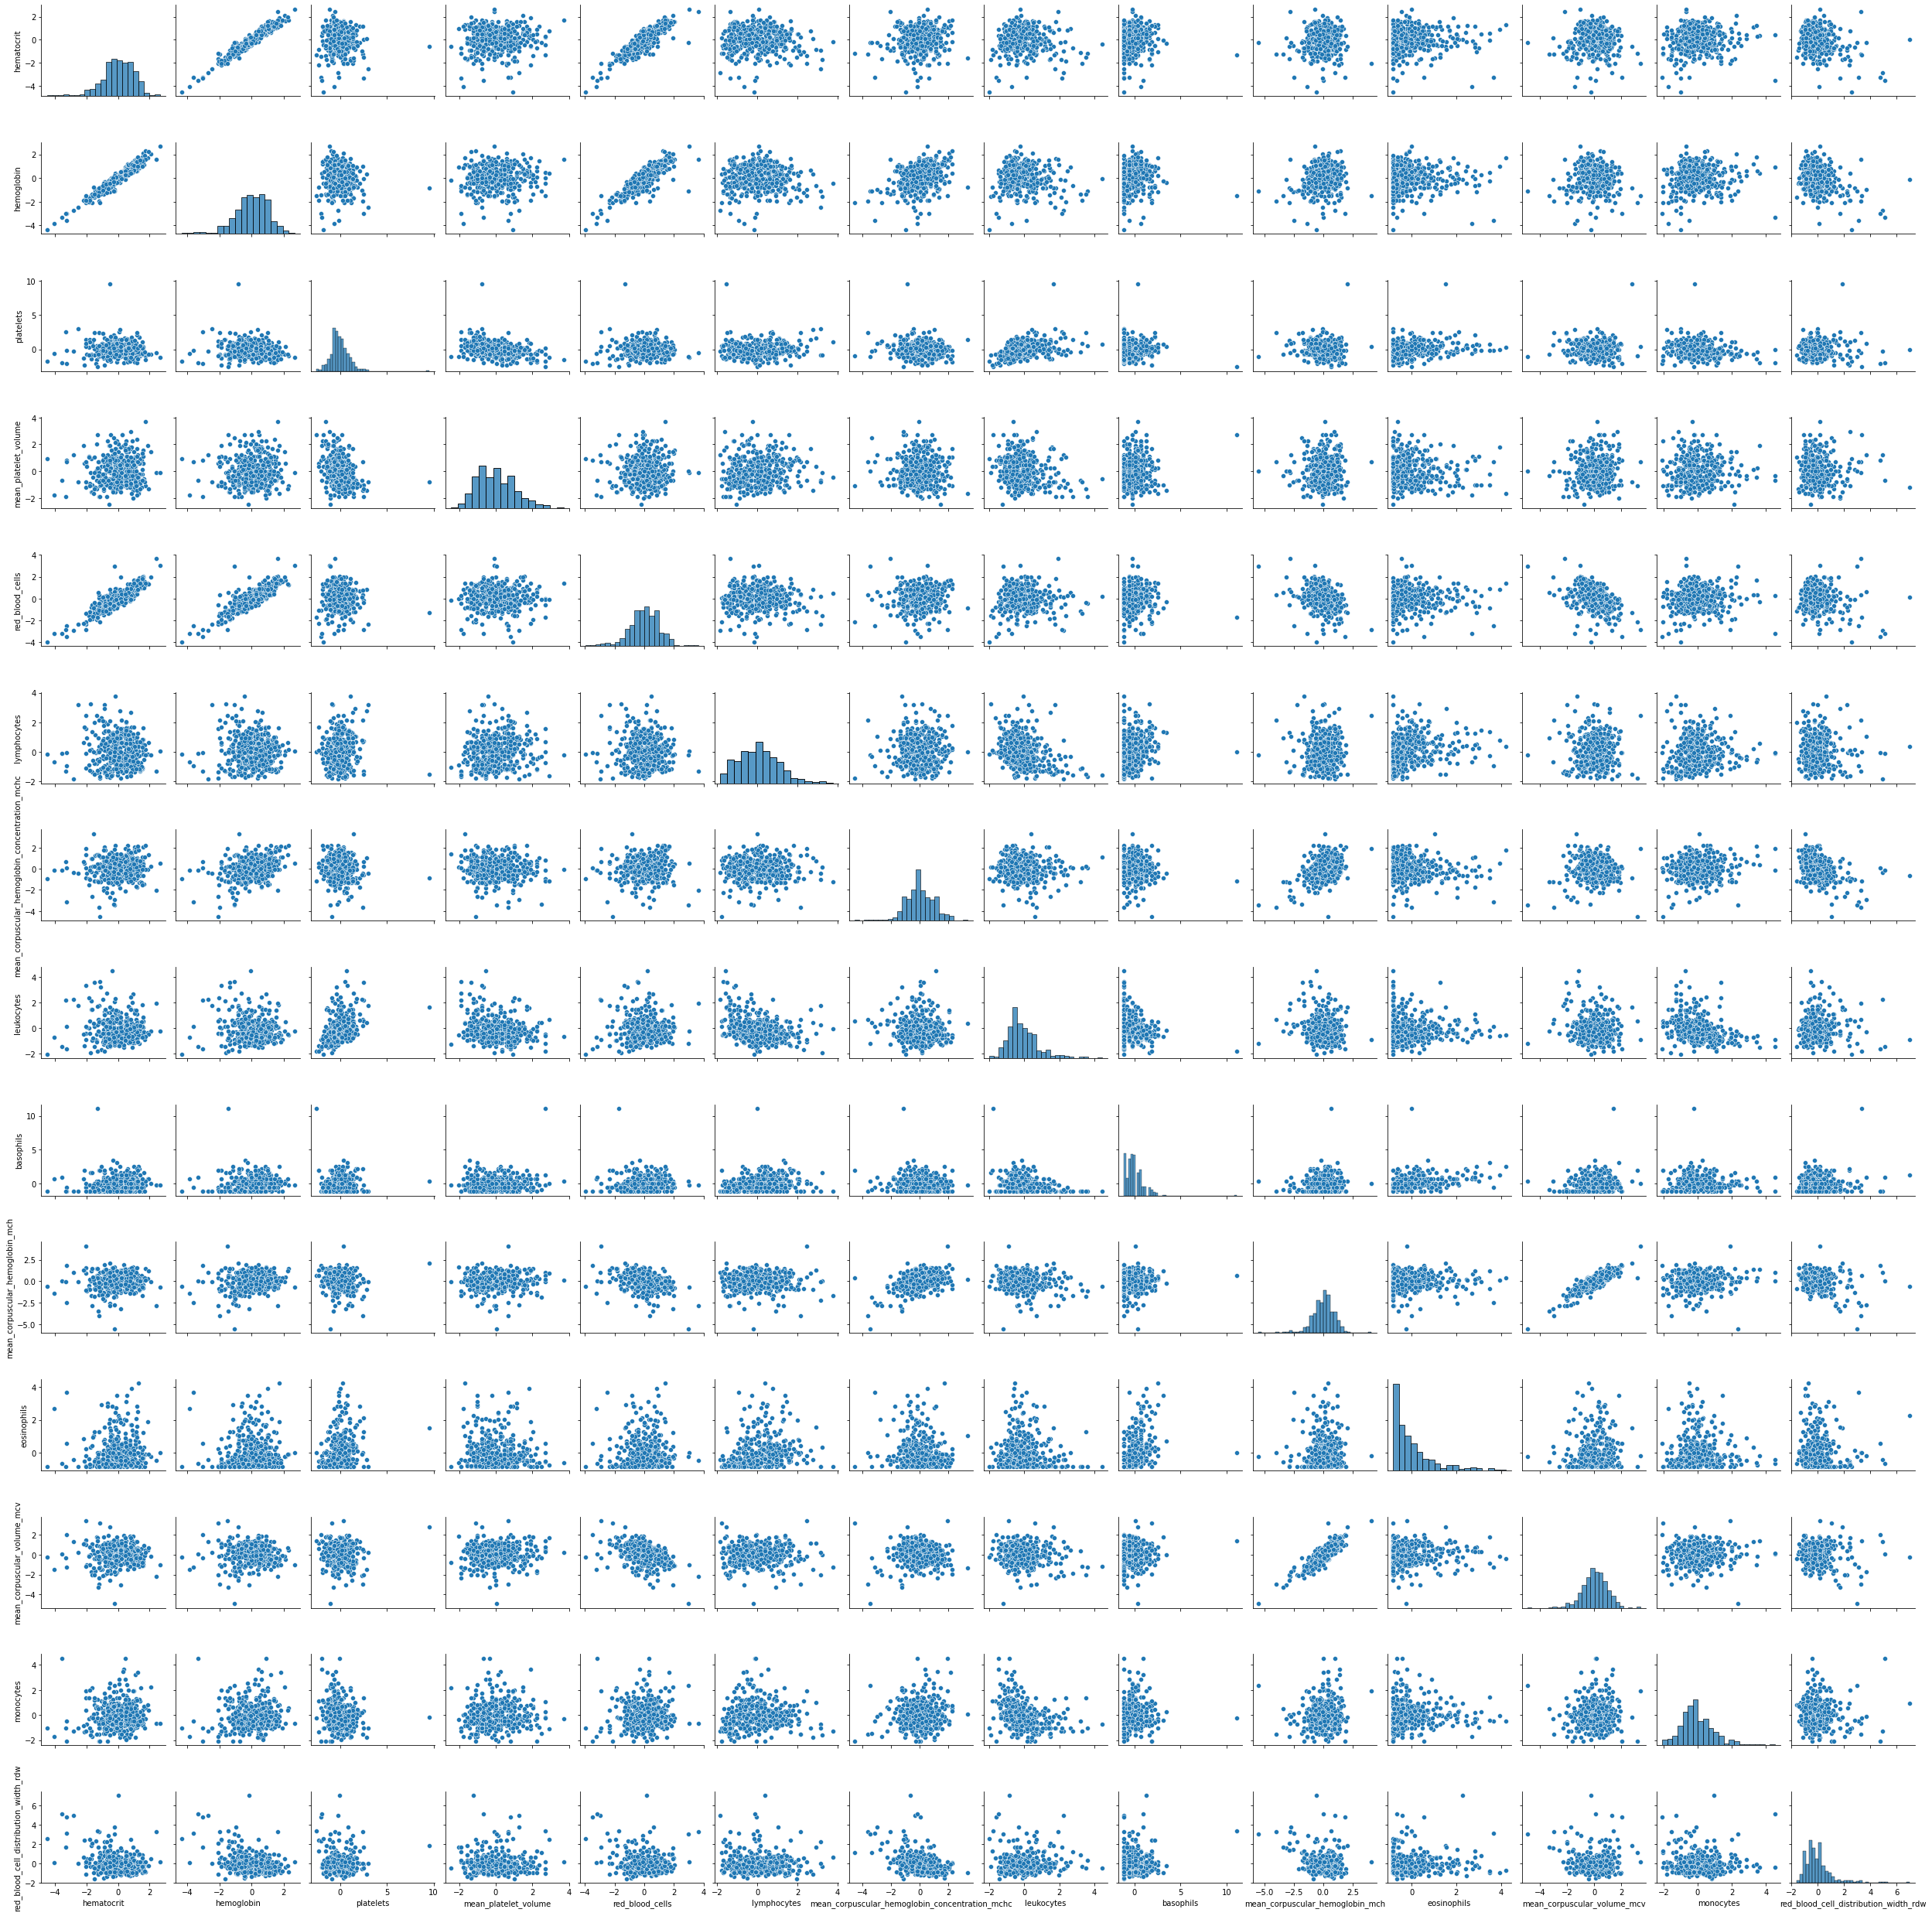

In [18]:
sns.pairplot(df[blood_variables_list])

<AxesSubplot:>

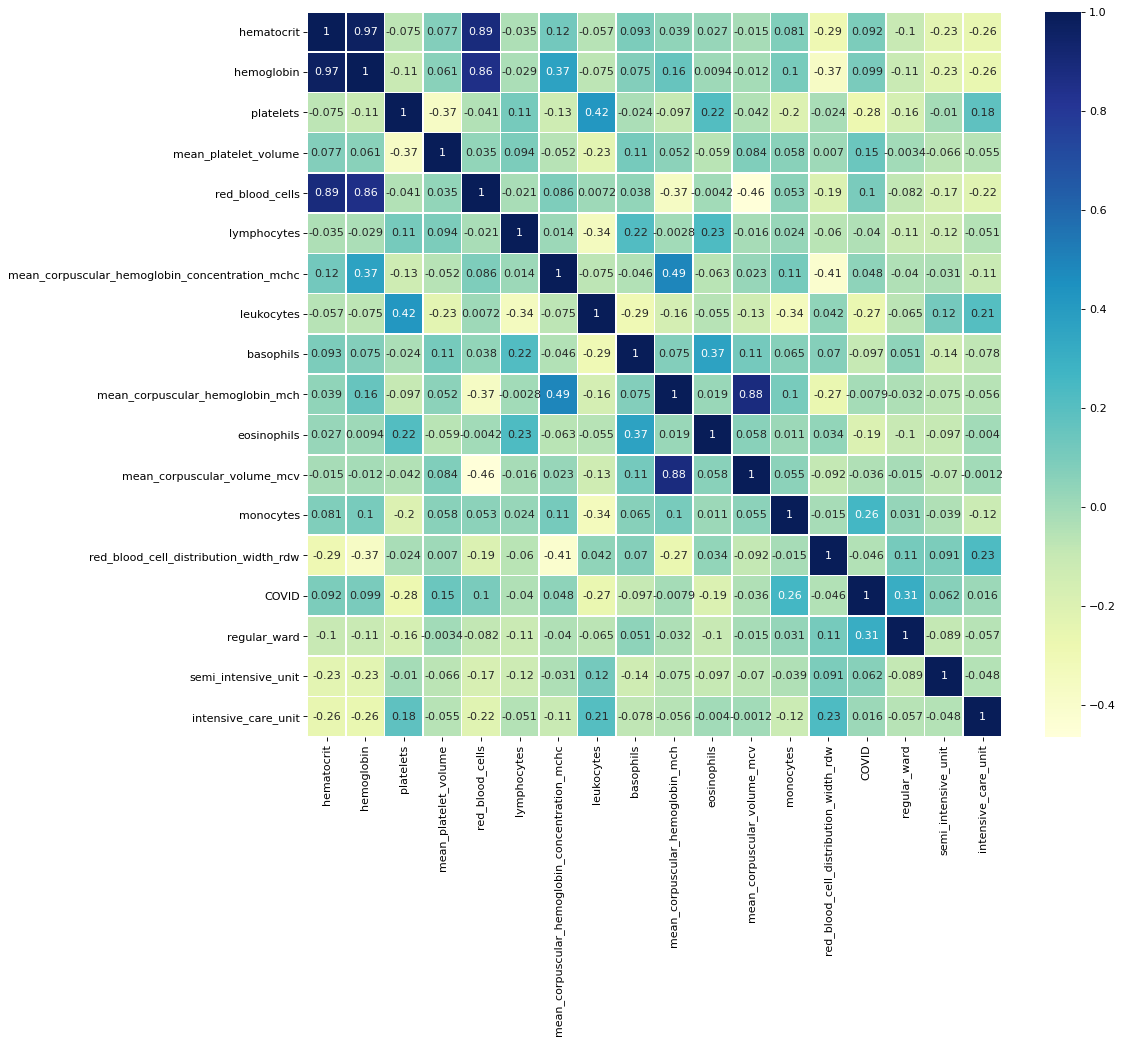

In [38]:
from matplotlib.pyplot import figure

figure(figsize=(14, 12), dpi=80)
sns.heatmap(df[blood_variables_list+['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)


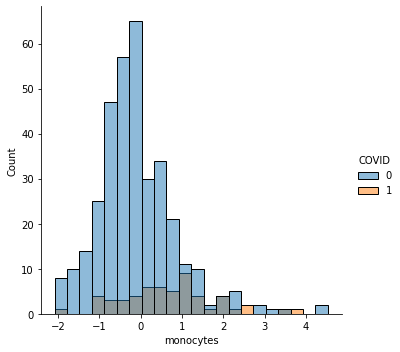

In [70]:
sns.displot(data=df,x='monocytes',hue='COVID')

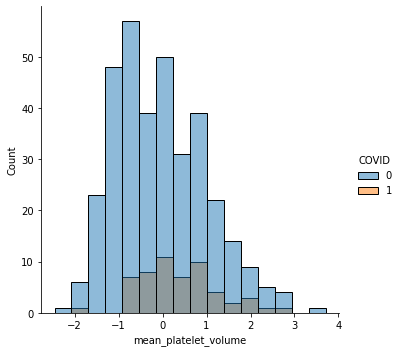

In [43]:
sns.displot(data=df,x='mean_platelet_volume',hue='COVID')

In [45]:
df[['COVID','mean_platelet_volume']].corr()

,COVID,mean_platelet_volume
COVID,1.000000,0.145372
mean_platelet_volume,0.145372,1.000000


In [49]:
df['high_mean_platelet_volume']=df['mean_platelet_volume'].apply(lambda x: 1 if x>-1 else 0)
df['mean_platelet_volume_v2']=df['high_mean_platelet_volume']*df['mean_platelet_volume']

In [52]:
df=df.drop('mean_platelet_volume_v2',axis=1)

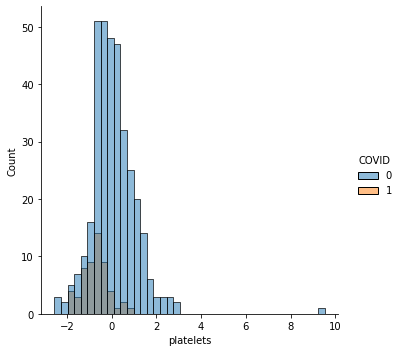

In [53]:
sns.displot(data=df,x='platelets',hue='COVID')

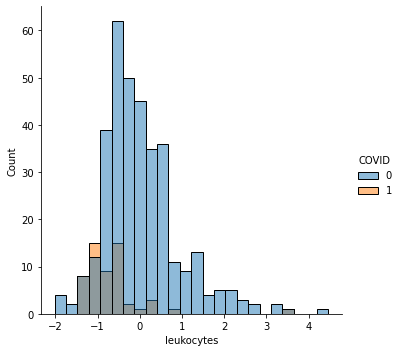

In [54]:
sns.displot(data=df,x='leukocytes',hue='COVID')

In [7]:
df['zeros']=1-df['regular_ward']-df['semi_intensive_unit']-df['intensive_care_unit']

<AxesSubplot:>

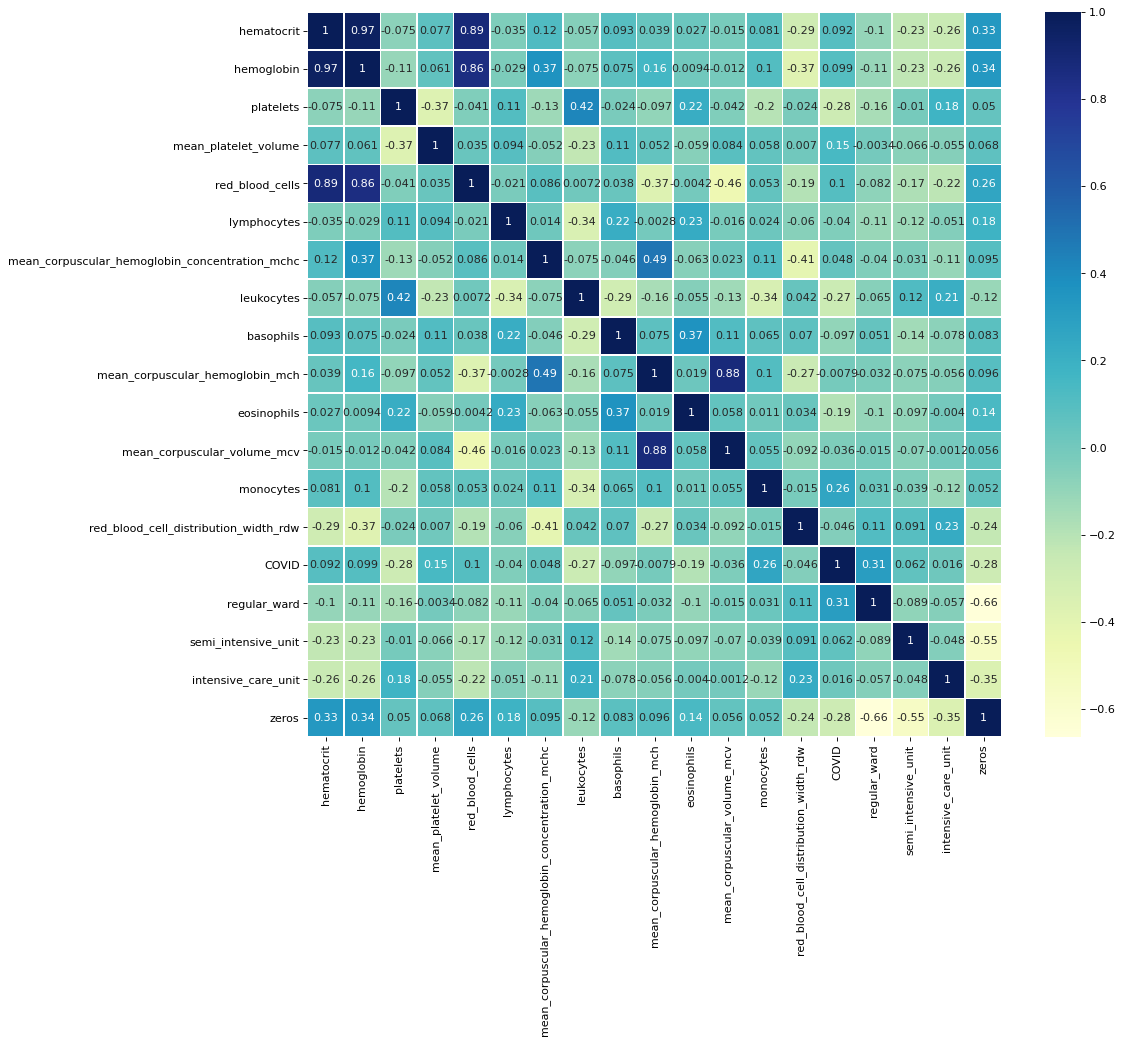

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(14, 12), dpi=80)
sns.heatmap(df[blood_variables_list+['COVID','regular_ward','semi_intensive_unit','intensive_care_unit','zeros']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)


<AxesSubplot:>

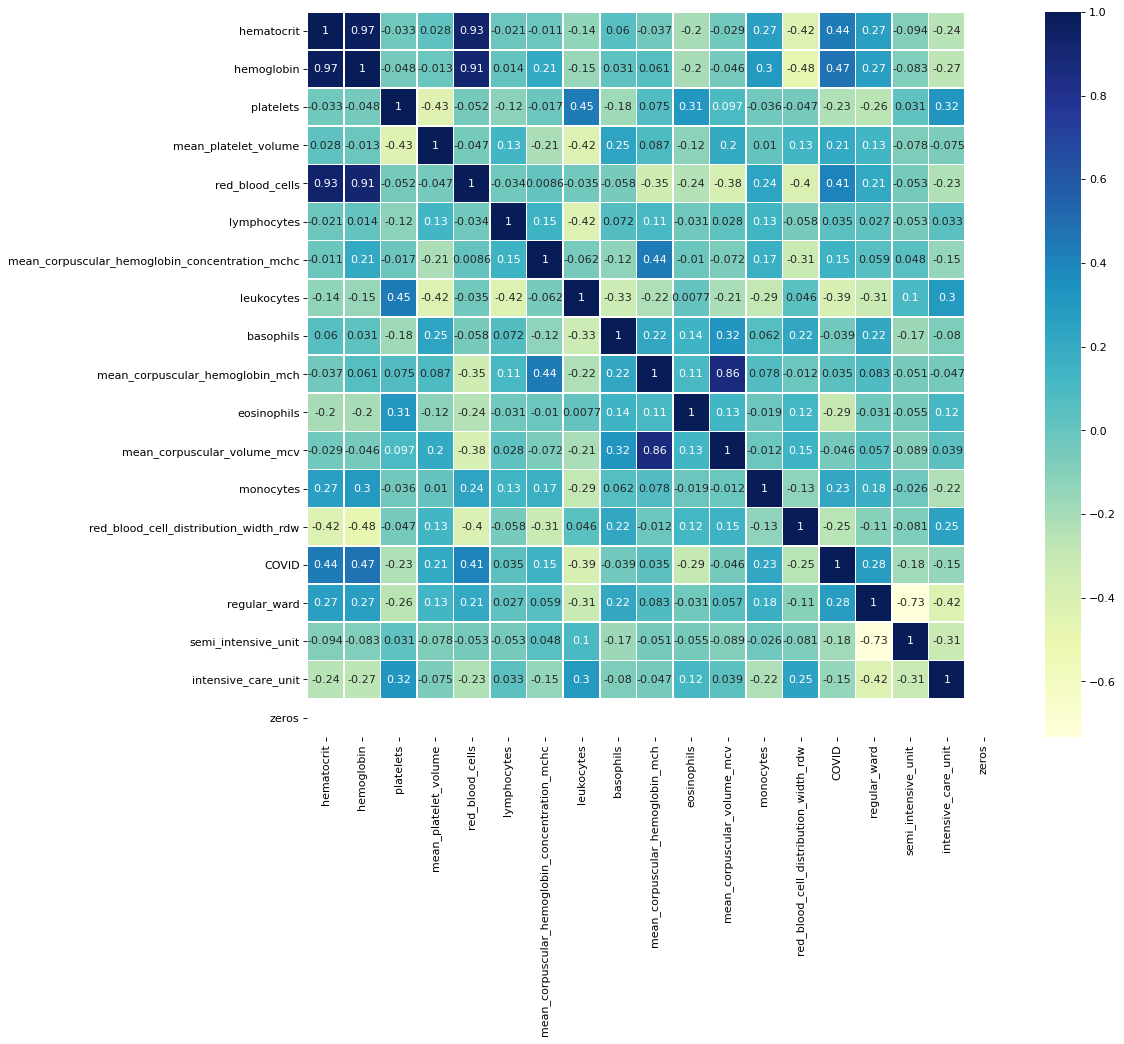

In [342]:
from matplotlib.pyplot import figure

figure(figsize=(14, 12), dpi=80)
sns.heatmap(df[df['zeros']!=1][blood_variables_list+['COVID','regular_ward','semi_intensive_unit','intensive_care_unit','zeros']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)


### Feature engineering of blood test variables

When looking at the correlation of blood test variables with target variables, **the correlation is usually weak which will lead to weaker predictions in the modelling.** To overcome this, we employ feature engineering. 

The weak correlation can be explained by the fact that the **levels of certain blood measure does not really tell us anything in terms of having COVID or hospitalizations if they are in the normal range. What is more important is the fact that they are below or above certain thresholds.** As an example, The normal range for hemoglobin is for men, 13.5 to 17.5 grams per deciliter, for women, 12.0 to 15.5 grams per deciliter [1]. Any level of hemoglobin between these thresholds would not be a concern. However, if the hemoglobin level is below 10 grams/deciliter or above 17.5 grams/deciliter, this would indicate the anomaly in the patient's condition and hence, the patient would be more likely to have COVID or be hospitalized. 

In our data, all blood variables are scaled to the distribution with mean of 0 and variance of 1, so we will not be able to use the actual thresholds used in medical research. Instead, we try to find optimal threshold by looking at the correlation between the blood test variables with threshold and target variables.

[1] https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075

In [175]:
df.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test,Nulls,zeros,Nulls_influenza_a,Nulls_influenza_b
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,0.0,0.0,0.0,0.0,NaN,NaN,0,0,1,1
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,0.0,0.0,0.0,0.0,NaN,NaN,0,1,1,1
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,NaN,NaN,NaN,NaN,0.0,0.0,1,1,0,0


In [421]:
df.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,influenza_b_rapid_test,influenza_a_rapid_test,Nulls,zeros,Nulls_influenza_a,Nulls_influenza_b,platelets_High,platelets_Low,Hematocrit_High,Hematocrit_Low
0,933,3,0,0,0,0,-0.495919,-0.523588,0.198610,0.459449,...,NaN,NaN,1,1,1,1,0,0,0,1
1,801,1,0,0,0,0,-0.221256,-0.147652,1.643218,-1.111256,...,0.0,0.0,0,1,0,0,1,0,0,1
2,4459,19,1,1,0,0,-0.106813,-0.272964,-0.894267,0.796029,...,NaN,NaN,0,0,1,1,0,0,0,1
3,4820,6,0,0,0,0,0.923173,0.541564,0.437284,-0.438097,...,NaN,NaN,0,1,1,1,0,0,0,1
4,1293,7,1,0,0,0,0.694287,0.729532,-0.743526,0.235063,...,0.0,0.0,1,1,0,0,0,0,0,1


In [422]:
df=df.drop(['platelets_High','platelets_Low','Hematocrit_High','Hematocrit_Low'],axis=1)

In [308]:
df['Hematocrit_High']=df['hematocrit'].apply(lambda x: 1 if x>1.5 else 0)
df['Hematocrit_Low']=df['hematocrit'].apply(lambda x: 1 if x<-1.5 else 0)


<AxesSubplot:>

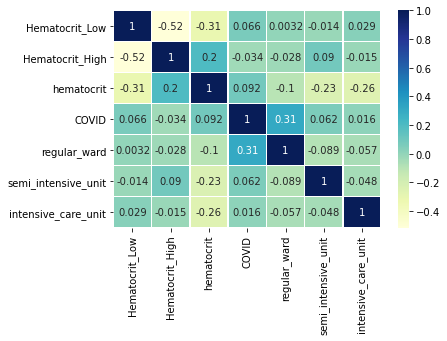

In [309]:
sns.heatmap(df[['Hematocrit_Low','Hematocrit_High','hematocrit','COVID','regular_ward','semi_intensive_unit','intensive_care_unit']].corr(),cmap="YlGnBu",linewidths=.5,annot=True)

In [231]:
df['monocytes_High']=df['monocytes'].apply(lambda x: 1 if x>1.5 else 0)
df['monocytes_Low']=df['monocytes'].apply(lambda x: 1 if x<-0.1 else 0)

In [245]:
df['monocytes'].apply(lambda x: 1 if x<-1.5 else 0)

0      0
1      0
2      0
3      0
4      0
      ..
399    0
400    0
401    0
402    0
403    0
Name: monocytes, Length: 404, dtype: int64

In [247]:
np.corrcoef(df['monocytes'].apply(lambda x: 1 if x<-1.5 else 0),df['monocytes'])[0,1]

-0.38456424327464345

### Algorithm to choose the optimal threshold:

**Step 1.** Create possible threshold levels between -2 and 2. Since the features are standardized, most of the data are in this range.

**Step 2.** For each blood feature and for each threshold, create a "low" variable which takes 1 if that blood level feature is *below* the threshold level, 0 otherwise.

**Step 3.** For each blood feature and for each threshold, create a "high" variable which takes 1 if that blood level feature is *above* the threshold level, 0 otherwise.

**Step 4.** Calculate the correlation between "low" variable and target (COVID,regular_ward, semi_intensive_unit, intensive_care_unit) and choose the one with the highest absolute value. Repeat the same thing with "high" variable



In [1254]:
threshold=np.arange(-1.6,-0.4,0.1)
target_variables=['COVID','regular_ward','semi_intensive_unit','intensive_care_unit']
#target_variables=['COVID']

low_corr=[]
high_corr=[]
corr_org=[]
n_samples=100
aux_low_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples))
aux_high_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples))
low_thrsh_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples))
high_thrsh_optimal=np.zeros((len(blood_variables_list),len(target_variables),n_samples))

sum_thrsh_low=np.zeros((len(blood_variables_list),len(target_variables)))
sum_thrsh_high=np.zeros((len(blood_variables_list),len(target_variables)))

for n in range(n_samples):
    for v in range(len(target_variables)):
        for i in range(len(blood_variables_list)): 
            for j in threshold:
                low_corr.append(np.corrcoef(df.sample(n=40)[target_variables[v]],df.sample(n=40)[blood_variables_list[i]].apply(lambda x: 1 if x<j else 0))[0,1])
                high_corr.append(np.corrcoef(df.sample(n=40)[target_variables[v]],df.sample(n=40)[blood_variables_list[i]].apply(lambda x: 1 if x>abs(j) else 0))[0,1])
                aux_low=np.average(low_corr)
                aux_high=np.average(high_corr)
                if abs(aux_low)>=aux_low_optimal[i,v,n]:
                    aux_low_optimal[i,v,n]=aux_low
                    low_thrsh_optimal[i,v,n]=j
                if abs(aux_high)>=aux_high_optimal[i,v,n]:
                    aux_high_optimal[i,v,n]=aux_high
                    high_thrsh_optimal[i,v,n]=abs(j)
                low_corr=[]
                high_corr=[]
    sum_thrsh_low=sum_thrsh_low+low_thrsh_optimal[:,:,n]
    sum_thrsh_high=sum_thrsh_high+high_thrsh_optimal[:,:,n]    
    avg_thrsh_low=sum_thrsh_low/(n+1)
    avg_thrsh_high=sum_thrsh_high/(n+1)
        

C:\Users\AGarashzade\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\AGarashzade\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [1255]:
avg_low_corr=np.zeros((len(blood_variables_list),len(target_variables)))
avg_high_corr=np.zeros((len(blood_variables_list),len(target_variables)))

for v in range(len(target_variables)):
    for i in range(len(blood_variables_list)): 
        avg_low_corr[i,v]=np.corrcoef(df[target_variables[v]],
                                      df[blood_variables_list[i]].apply(lambda x: 1 if x<avg_thrsh_low[i,v] else 0))[0,1]
        avg_high_corr[i,v]=np.corrcoef(df[target_variables[v]],
                                      df[blood_variables_list[i]].apply(lambda x: 1 if x>avg_thrsh_high[i,v] else 0))[0,1]        

-0.8299999999999994

In [1256]:
Low_thrsh_optimal_corr=pd.DataFrame(data=avg_low_corr,index=blood_variables_list,columns=target_variables)
Low_thrsh_optimal=pd.DataFrame(data=np.round(avg_thrsh_low,decimals=2),index=blood_variables_list,columns=target_variables)

High_thrsh_optimal_corr=pd.DataFrame(data=avg_high_corr,index=blood_variables_list,columns=target_variables)
High_thrsh_optimal=pd.DataFrame(data=np.round(avg_thrsh_high,decimals=2),index=blood_variables_list,columns=target_variables)

In [1257]:
df_blood_variables=Low_thrsh_optimal.join(Low_thrsh_optimal_corr,on=Low_thrsh_optimal.index,lsuffix='_thrsh_low',rsuffix='_corr_low')

In [1258]:
df_blood_variables=df_blood_variables.join(High_thrsh_optimal, on=df_blood_variables.index)


In [1259]:
df_blood_variables.rename(columns={'COVID': 'COVID_thrsh_high','regular_ward': 'regular_ward_thrsh_high',
                           'semi_intensive_unit': 'semi_intensive_unit_thrsh_high',
                        'intensive_care_unit': 'intensive_care_unit_thrsh_high'},inplace=True)

In [1260]:
df_blood_variables=df_blood_variables.join(High_thrsh_optimal_corr, on=df_blood_variables.index)

df_blood_variables.rename(columns={'COVID': 'COVID_corr_high','regular_ward': 'regular_ward_corr_high',
                           'semi_intensive_unit': 'semi_intensive_unit_corr_high',
                        'intensive_care_unit': 'intensive_care_unit_corr_high'},inplace=True)

In [944]:
df_blood_variables.head()

,COVID_thrsh_low,regular_ward_thrsh_low,semi_intensive_unit_thrsh_low,intensive_care_unit_thrsh_low,COVID_corr_low,regular_ward_corr_low,semi_intensive_unit_corr_low,intensive_care_unit_corr_low,COVID_thrsh_high,regular_ward_thrsh_high,semi_intensive_unit_thrsh_high,intensive_care_unit_thrsh_high,COVID_corr_high,regular_ward_corr_high,semi_intensive_unit_corr_high,intensive_care_unit_corr_high
hematocrit,-0.8,-1.3,-0.7,-1.1,0.208297,0.074068,-0.034588,0.136782,1.3,1.1,0.7,1.4,0.119502,0.148738,0.029338,0.174595
hemoglobin,-0.7,-1.4,-0.8,-1.2,-0.070896,0.280037,0.101701,0.137066,1.0,1.0,1.0,0.7,0.117102,0.185814,0.172906,-0.011429
platelets,-1.2,-0.9,-1.3,-1.5,0.077407,0.083568,0.111612,0.224037,0.8,0.7,1.3,1.6,0.104650,-0.112792,0.175781,0.119727
mean_platelet_volume,-1.1,-0.8,-0.7,-1.3,0.092472,0.063685,-0.059391,0.116890,0.8,1.4,0.9,1.0,0.199273,0.164256,0.098722,0.232529
red_blood_cells,-1.3,-0.7,-0.8,-0.7,0.103946,0.068967,0.087860,0.022753,1.6,1.1,1.0,1.4,0.158721,0.093048,0.055728,0.310314


In [1261]:
COVID_corr=[np.corrcoef(df['COVID'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
regular_ward_corr=[np.corrcoef(df['regular_ward'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
semi_intensive_corr=[np.corrcoef(df['semi_intensive_unit'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]
intensive_corr=[np.corrcoef(df['intensive_care_unit'],df[blood_variables_list[i]])[0,1] for i in range(len(blood_variables_list))]

In [1262]:
original_corrs=pd.DataFrame(zip(COVID_corr,regular_ward_corr,semi_intensive_corr,intensive_corr),index=blood_variables_list, 
             columns=['COVID_corr','regular_ward_corr','semi_intensive_corr','intensive_corr'])

In [1263]:
df_blood_variables=df_blood_variables.join(original_corrs, on=df_blood_variables.index)

### Which type of variable should we choose to use in the model? 

#### Comparing "low" and "high" threshold features with original features and choosing the one with maximum correlation

In [1264]:
df_blood_variables['COVID_max_corr']=abs(df_blood_variables[['COVID_corr','COVID_corr_high','COVID_corr_low']]).max(axis=1)
df_blood_variables['regular_ward_max_corr']=abs(df_blood_variables[['regular_ward_corr','regular_ward_corr_high','regular_ward_corr_low']]).max(axis=1)
df_blood_variables['semi_intensive_max_corr']=abs(df_blood_variables[['semi_intensive_corr','semi_intensive_unit_corr_high','semi_intensive_unit_corr_low']]).max(axis=1)
df_blood_variables['intensive_max_corr']=abs(df_blood_variables[['intensive_corr','intensive_care_unit_corr_high','intensive_care_unit_corr_low']]).max(axis=1)


In [1265]:
df_blood_variables['COVID_corr_abs']=abs(df_blood_variables['COVID_corr'])
df_blood_variables['regular_ward_corr_abs']=abs(df_blood_variables['regular_ward_corr'])
df_blood_variables['semi_intensive_corr_abs']=abs(df_blood_variables['semi_intensive_corr'])
df_blood_variables['intensive_corr_abs']=abs(df_blood_variables['intensive_corr'])


Text(0, 0.5, 'Magnititude of Correlation')

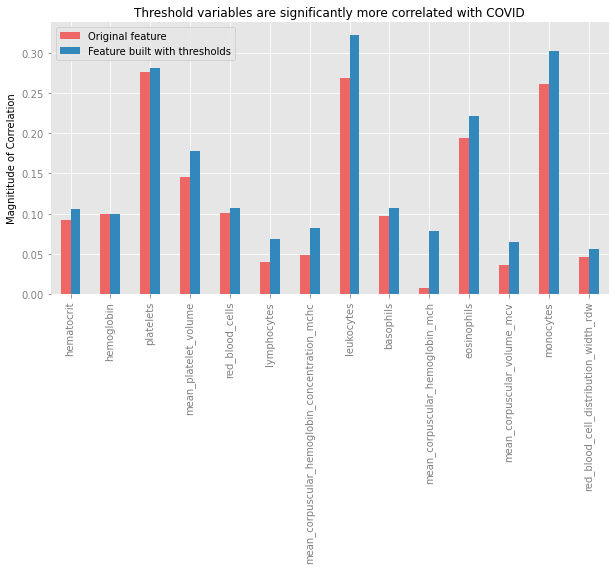

In [1266]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)


df_blood_variables.plot(y=['COVID_corr_abs','COVID_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Feature built with thresholds'])
plt.title('Threshold variables are significantly more correlated with COVID')
plt.ylabel('Magnititude of Correlation')

(0.0, 0.25)

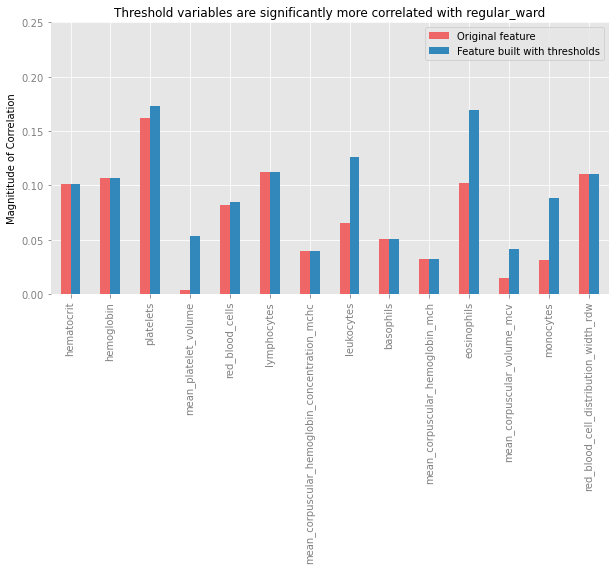

In [1000]:
df_blood_variables.plot(y=['regular_ward_corr_abs','regular_ward_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Feature built with thresholds'])
plt.title('Threshold variables are significantly more correlated with regular_ward')
plt.ylabel('Magnititude of Correlation')
plt.ylim([0,0.25])

Text(0, 0.5, 'Magnititude of Correlation')

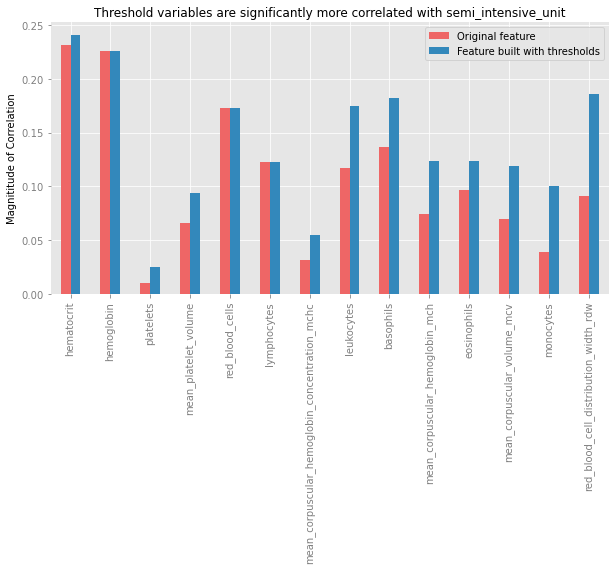

In [1267]:
df_blood_variables.plot(y=['semi_intensive_corr_abs','semi_intensive_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Feature built with thresholds'])
plt.title('Threshold variables are significantly more correlated with semi_intensive_unit')
plt.ylabel('Magnititude of Correlation')


Text(0, 0.5, 'Magnititude of Correlation')

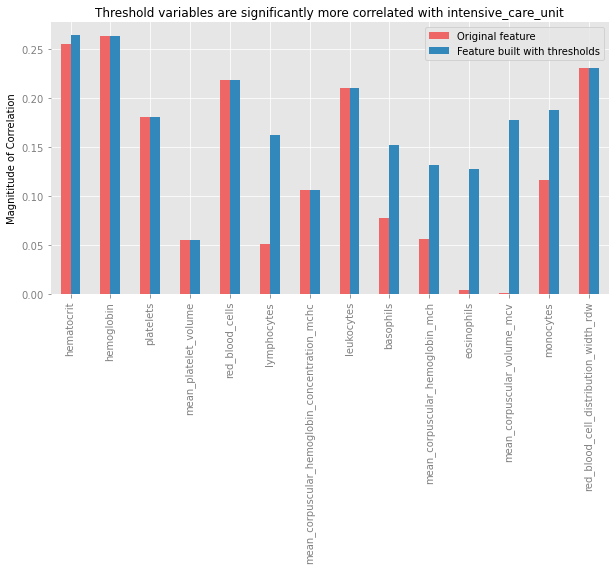

In [1268]:
df_blood_variables.plot(y=['intensive_corr_abs','intensive_max_corr'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Feature built with thresholds'])
plt.title('Threshold variables are significantly more correlated with intensive_care_unit')
plt.ylabel('Magnititude of Correlation')

***Conclusion***: Threshold variables improves the correlation with target variables in almost all the cases.

One thing to notice is that optimal threshold can change depending on which target variable we are looking at. This is why, we will need to use different set of blood variables for each target variable prediction:

In [439]:
df_blood_variables.head()

,COVID_thrsh_low,regular_ward_thrsh_low,semi_intensive_unit_thrsh_low,intensive_care_unit_thrsh_low,COVID_corr_low,regular_ward_corr_low,semi_intensive_unit_corr_low,intensive_care_unit_corr_low,COVID_thrsh_high,regular_ward_thrsh_high,...,semi_intensive_corr,intensive_corr,COVID_max_corr,regular_ward_max_corr,semi_intensive_max_corr,intensive_max_corr,COVID_corr_abs,regular_ward_corr_abs,semi_intensive_corr_abs,intensive_corr_abs
hematocrit,1.6,-2.0,-1.5,-0.8,0.066415,0.167195,0.278206,0.302297,0.6,1.1,...,-0.231203,-0.255606,0.113793,0.167195,0.278206,0.302297,0.092217,0.101161,0.231203,0.255606
hemoglobin,1.9,-1.3,-0.6,-1.6,0.048742,0.128676,0.222784,0.334560,0.4,2.0,...,-0.226099,-0.262939,0.112927,0.128676,0.226099,0.334560,0.099277,0.107187,0.226099,0.262939
platelets,-0.1,-1.9,2.0,2.0,0.316213,0.194181,-0.074115,-0.149906,2.0,1.7,...,-0.010498,0.180592,0.316213,0.194181,0.091713,0.197121,0.276543,0.162089,0.010498,0.180592
mean_platelet_volume,2.0,0.9,-1.8,-1.8,-0.030414,0.076631,0.208214,0.099057,-0.7,2.0,...,-0.066174,-0.054814,0.185877,0.076631,0.208214,0.099057,0.145372,0.003411,0.066174,0.054814
red_blood_cells,2.0,-2.0,-0.8,-2.0,-0.033202,0.167195,0.209829,0.285719,0.9,0.9,...,-0.172575,-0.217996,0.110782,0.167195,0.209829,0.285719,0.100720,0.081912,0.172575,0.217996


In [ ]:
df_blood_variables['inte']

In [1272]:
df_blood_variables['Optimal_feature_COVID']=""
df_blood_variables['Optimal_feature_regular']=""
df_blood_variables['Optimal_feature_semi_intensive']=""
df_blood_variables['Optimal_feature_intensive']=""

for i in range(len(df_blood_variables)):
    #Optimal features for COVID
    if df_blood_variables['COVID_max_corr'][i]==abs(df_blood_variables['COVID_corr_high'])[i] and abs(df_blood_variables['COVID_corr_high'])[i]-df_blood_variables['COVID_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_COVID'][i]='Dummy(x>'+str(df_blood_variables['COVID_thrsh_high'][i])+')'       

    elif df_blood_variables['COVID_max_corr'][i]==abs(df_blood_variables['COVID_corr_low'])[i] and abs(df_blood_variables['COVID_corr_low'])[i]-df_blood_variables['COVID_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_COVID'][i]='Dummy(x<'+str(df_blood_variables['COVID_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_COVID'][i]='Original variable'    
    
    #Optimal features for regular ward
    if df_blood_variables['regular_ward_max_corr'][i]==abs(df_blood_variables['regular_ward_corr_high'])[i] and abs(df_blood_variables['regular_ward_corr_high'])[i]-df_blood_variables['regular_ward_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_regular'][i]='Dummy(x>'+str(df_blood_variables['regular_ward_thrsh_high'][i])+')'       

    elif df_blood_variables['regular_ward_max_corr'][i]==abs(df_blood_variables['regular_ward_corr_low'])[i] and abs(df_blood_variables['regular_ward_corr_low'])[i]-df_blood_variables['regular_ward_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_regular'][i]='Dummy(x<'+str(df_blood_variables['regular_ward_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_regular'][i]='Original variable'       
    
    #Optimal features for semi intensive
    if df_blood_variables['semi_intensive_max_corr'][i]==abs(df_blood_variables['semi_intensive_unit_corr_high'])[i] and abs(df_blood_variables['semi_intensive_unit_corr_high'])[i]-df_blood_variables['semi_intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Dummy(x>'+str(df_blood_variables['semi_intensive_unit_thrsh_high'][i])+')'       

    elif df_blood_variables['semi_intensive_max_corr'][i]==abs(df_blood_variables['semi_intensive_unit_corr_low'])[i] and abs(df_blood_variables['semi_intensive_unit_corr_low'])[i]-df_blood_variables['semi_intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Dummy(x<'+str(df_blood_variables['semi_intensive_unit_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_semi_intensive'][i]='Original variable'       
    
    #Optimal features for intensive care
    if df_blood_variables['intensive_max_corr'][i]==abs(df_blood_variables['intensive_care_unit_corr_high'])[i] and abs(df_blood_variables['intensive_care_unit_corr_high'])[i]-df_blood_variables['intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_intensive'][i]='Dummy(x>'+str(df_blood_variables['intensive_care_unit_thrsh_high'][i])+')'       

    elif df_blood_variables['intensive_max_corr'][i]==abs(df_blood_variables['intensive_care_unit_corr_low'])[i] and abs(df_blood_variables['intensive_care_unit_corr_low'])[i]-df_blood_variables['intensive_corr_abs'][i]>0.05:
        df_blood_variables['Optimal_feature_intensive'][i]='Dummy(x<'+str(df_blood_variables['intensive_care_unit_thrsh_low'][i])+')' 
    else:
        df_blood_variables['Optimal_feature_intensive'][i]='Original variable'       
    


        

<ipython-input-1272-a23e5bca805d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_COVID'][i]='Original variable'
<ipython-input-1272-a23e5bca805d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_regular'][i]='Original variable'
<ipython-input-1272-a23e5bca805d>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_blood_variables['Optimal_feature_semi_intensive'

#### Optimal variables list:

In [1273]:
df_blood_variables[['Optimal_feature_COVID','Optimal_feature_regular','Optimal_feature_semi_intensive','Optimal_feature_intensive']]

,Optimal_feature_COVID,Optimal_feature_regular,Optimal_feature_semi_intensive,Optimal_feature_intensive
hematocrit,Original variable,Original variable,Original variable,Original variable
hemoglobin,Original variable,Original variable,Original variable,Original variable
platelets,Original variable,Original variable,Original variable,Original variable
mean_platelet_volume,Original variable,Dummy(x>0.93),Original variable,Original variable
red_blood_cells,Original variable,Original variable,Original variable,Original variable
lymphocytes,Original variable,Original variable,Original variable,Dummy(x<-0.8)
mean_corpuscular_hemoglobin_concentration_mchc,Original variable,Original variable,Original variable,Original variable
leukocytes,Dummy(x<-0.87),Dummy(x<-0.9),Dummy(x>0.94),Original variable
basophils,Original variable,Original variable,Original variable,Dummy(x<-0.66)
mean_corpuscular_hemoglobin_mch,Dummy(x>0.88),Original variable,Original variable,Dummy(x<-0.86)


In [453]:
df_blood_variables['Optimal_feature_COVID'][3][6:-1]

'x>-0.7'

In [ ]:
def aux_str(x):
    

In [809]:
for i in blood_variables_list:
    if i=='hemoglobin':
        df[i+'_COVID']=df[i]
        df[i+'_regular']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_regular'][i][6:-1]) else 0)
        df[i+'_semi_intensive']=df[i]
        df[i+'_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_intensive'][i][6:-1]) else 0)
    elif i=='platelets':
        df[i+'_COVID']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_COVID'][i][6:-1]) else 0)
        df[i+'_regular']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_regular'][i][6:-1]) else 0)
        df[i+'_semi_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_semi_intensive'][i][6:-1]) else 0)
        df[i+'_intensive']=df[i]
    elif i=='mean_corpuscular_hemoglobin_concentration_mchc' or i=='leukocytes':
        df[i+'_COVID']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_COVID'][i][6:-1]) else 0)
        df[i+'_regular']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_regular'][i][6:-1]) else 0)
        df[i+'_semi_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_semi_intensive'][i][6:-1]) else 0)
        df[i+'_intensive']=df[i]
    elif i=='red_blood_cell_distribution_width_rdw':
        df[i+'_COVID']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_COVID'][i][6:-1]) else 0)
        df[i+'_regular']=df[i]
        df[i+'_semi_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_semi_intensive'][i][6:-1]) else 0)
        df[i+'_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_intensive'][i][6:-1]) else 0)
    else:
        df[i+'_COVID']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_COVID'][i][6:-1]) else 0)
        df[i+'_regular']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_regular'][i][6:-1]) else 0)
        df[i+'_semi_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_semi_intensive'][i][6:-1]) else 0)
        df[i+'_intensive']=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature_intensive'][i][6:-1]) else 0)
    

In [1274]:
target_suffix=['_COVID','_regular','_semi_intensive','_intensive']

for v in target_suffix:
    for i in blood_variables_list:
        if df_blood_variables['Optimal_feature'+v][i]=='Original variable':
            df[i+v]=df[i]
        else:
            df[i+v]=df[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature'+v][i][6:-1]) else 0)
            

### 4.3. Cubes

In [730]:
for i in blood_variables_list:
    df[i+'_cube']=df[i].apply(lambda x: x**3)

In [1197]:
cube_corr=np.zeros((len(blood_variables_list),len(target_variables)))
original_corr=np.zeros((len(blood_variables_list),len(target_variables)))
for v in range(len(target_variables)):
    for i in range(len(blood_variables_list)):
        cube_corr[i,v]=np.corrcoef(df[target_variables[v]],df[blood_variables_list[i]].apply(lambda x: x**2))[0,1]
        original_corr[i,v]=np.corrcoef(df[target_variables[v]],df[blood_variables_list[i]])[0,1]


In [1201]:
cubes_corr_df=pd.DataFrame(cube_corr,index=blood_variables_list,columns=target_variables)
original_corr_df=pd.DataFrame(abs(original_corr),index=blood_variables_list,columns=target_variables)

In [1202]:
cubes_corr_df_v2=original_corr_df.join(cubes_corr_df,on=original_corr_df.index,rsuffix='_cubes')

In [755]:
cubes_corr_df_v2.head()

,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,COVID_cubes,regular_ward_cubes,semi_intensive_unit_cubes,intensive_care_unit_cubes
hematocrit,0.092217,-0.101161,-0.231203,-0.255606,0.058136,-0.144282,-0.175905,-0.163514
hemoglobin,0.099277,-0.107187,-0.226099,-0.262939,0.064357,-0.133404,-0.180612,-0.210876
platelets,-0.276543,-0.162089,-0.010498,0.180592,-0.031667,-0.025173,-0.010428,0.294681
mean_platelet_volume,0.145372,-0.003411,-0.066174,-0.054814,0.054407,-0.010387,-0.052664,-0.047248
red_blood_cells,0.100720,-0.081912,-0.172575,-0.217996,0.081568,-0.139077,-0.091060,-0.154369


<AxesSubplot:>

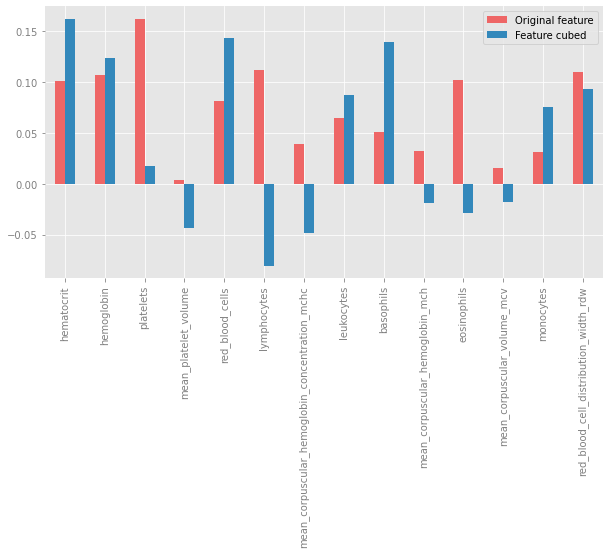

In [1217]:
cubes_corr_df_v2.plot(y=['regular_ward','regular_ward_cubes'],kind='bar',figsize=(10,5),use_index=True,label=['Original feature','Feature cubed'])


### 4.2. Incorporating the test set

In [1275]:
df_test=pd.read_csv('test_set_all.csv')

In [1011]:
df_test.head()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,influenza_b_rapid_test,influenza_a_rapid_test
0,693,11,0,0,0,0,1.266501,1.293436,-0.228491,-0.550290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5022,13,1,0,0,0,1.174947,0.980156,-0.190806,-0.438097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,5232,14,0,0,0,1,-0.038148,-0.210308,-0.454604,-1.560029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,391,7,0,0,0,0,0.579844,0.290940,-0.077750,-1.223449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1280,4,0,0,0,0,0.328069,0.792188,0.060430,2.366734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [637]:
for i in df_test.columns:
    print(str(i) + ' ' + str(df_test[i].isna().sum()))

Id 0
patient_age_quantile 0
COVID 0
regular_ward 0
semi_intensive_unit 0
intensive_care_unit 0
hematocrit 0
hemoglobin 0
platelets 0
mean_platelet_volume 1
red_blood_cells 0
lymphocytes 0
mean_corpuscular_hemoglobin_concentration_mchc 0
leukocytes 0
basophils 0
mean_corpuscular_hemoglobin_mch 0
eosinophils 0
mean_corpuscular_volume_mcv 0
monocytes 0
red_blood_cell_distribution_width_rdw 0
respiratory_syncytial_virus 79
influenza_a 79
influenza_b 79
parainfluenza_1 79
coronavirusnl63 79
rhinovirus_enterovirus 79
coronavirus_hku1 79
parainfluenza_3 79
chlamydophila_pneumoniae 79
adenovirus 79
parainfluenza_4 79
coronavirus229e 79
coronavirusoc43 79
inf_a_h1n1_2009 79
bordetella_pertussis 79
metapneumovirus 79
parainfluenza_2 79
influenza_b_rapid_test 132
influenza_a_rapid_test 132


In [1276]:
df_test[blood_variables_list]=df_test[blood_variables_list].fillna(df_test[blood_variables_list].mean()) 
#filling null values for blood test variables

In [1277]:
df_test['Nulls'] = df_test['parainfluenza_4'].apply(lambda x: 1 if pd.isna(x) else 0)
df_test['Nulls_influenza_a']=df_test['influenza_a_rapid_test'].apply(lambda x: 1 if pd.isna(x) else 0)
df_test['Nulls_influenza_b']=df_test['influenza_b_rapid_test'].apply(lambda x: 1 if pd.isna(x) else 0)
#Creating Null columns

In [1014]:
df_test[blood_variables_list].dtypes

hematocrit                                        float64
hemoglobin                                        float64
platelets                                         float64
mean_platelet_volume                              float64
red_blood_cells                                   float64
lymphocytes                                       float64
mean_corpuscular_hemoglobin_concentration_mchc    float64
leukocytes                                        float64
basophils                                         float64
mean_corpuscular_hemoglobin_mch                    object
eosinophils                                       float64
mean_corpuscular_volume_mcv                       float64
monocytes                                         float64
red_blood_cell_distribution_width_rdw             float64
dtype: object

In [1278]:
df_test['mean_corpuscular_hemoglobin_mch']=pd.to_numeric(df_test['mean_corpuscular_hemoglobin_mch'],errors='coerce')

In [1279]:
df_test[blood_variables_list]=df_test[blood_variables_list].fillna(df_test[blood_variables_list].mean()) 

In [1280]:
target_suffix=['_COVID','_regular','_semi_intensive','_intensive']

for v in target_suffix:
    for i in blood_variables_list:
        if df_blood_variables['Optimal_feature'+v][i]=='Original variable':
            df_test[i+v]=df_test[i]
        else:
            df_test[i+v]=df_test[i].apply(lambda x: 1 if eval(df_blood_variables['Optimal_feature'+v][i][6:-1]) else 0)
     


In [1469]:
df_test.describe()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,red_blood_cells_intensive,lymphocytes_intensive,mean_corpuscular_hemoglobin_concentration_mchc_intensive,leukocytes_intensive,basophils_intensive,mean_corpuscular_hemoglobin_mch_intensive,eosinophils_intensive,mean_corpuscular_volume_mcv_intensive,monocytes_intensive,red_blood_cell_distribution_width_rdw_intensive
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2797.542714,11.251256,0.140704,0.090452,0.070352,0.085427,-0.029751,-0.018877,0.070467,-0.043154,...,-0.006347,0.246231,0.031481,0.159994,0.256281,0.160804,0.376884,0.170854,0.165829,0.010125
std,1925.807187,5.932889,0.348592,0.287552,0.256384,0.280221,0.983644,0.986249,0.946788,0.951237,...,0.973833,0.431901,0.957093,1.125856,0.437680,0.368277,0.485828,0.377331,0.372865,0.956999
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.608765,-3.468420,-2.062515,-2.345381,...,-3.635631,0.000000,-5.431808,-1.733675,0.000000,0.000000,0.000000,0.000000,0.000000,-1.332725
25%,886.500000,6.500000,0.000000,0.000000,0.000000,0.000000,-0.495919,-0.523588,-0.592784,-0.550290,...,-0.559134,0.000000,-0.552476,-0.589947,0.000000,0.000000,0.000000,0.000000,0.000000,-0.580845
50%,2699.000000,13.000000,0.000000,0.000000,0.000000,0.000000,-0.015259,0.040316,0.010183,-0.101517,...,-0.039039,0.000000,-0.054585,-0.094610,0.000000,0.000000,0.000000,0.000000,0.000000,-0.094334
75%,4822.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.694287,0.729532,0.619431,0.627739,...,0.595654,0.000000,0.642463,0.667875,1.000000,0.000000,1.000000,0.000000,0.000000,0.347948
max,5643.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.410930,2.483899,3.376748,2.591120,...,2.922861,1.000000,2.932760,4.522042,1.000000,1.000000,1.000000,1.000000,1.000000,4.947686


In [1468]:
df.describe()

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,red_blood_cells_cube,lymphocytes_cube,mean_corpuscular_hemoglobin_concentration_mchc_cube,leukocytes_cube,basophils_cube,mean_corpuscular_hemoglobin_mch_cube,eosinophils_cube,mean_corpuscular_volume_mcv_cube,monocytes_cube,red_blood_cell_distribution_width_rdw_cube
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,2842.487624,11.086634,0.136139,0.096535,0.069307,0.029703,0.014655,0.009298,-0.034796,0.021308,...,-0.417688,0.733620,-0.514711,0.840455,3.971750,-0.796116,1.512543,-0.370615,1.113823,2.547036
std,1816.408508,5.615904,0.343361,0.295689,0.254290,0.169977,1.010075,1.009019,1.024556,1.020009,...,6.253431,4.826246,7.026562,6.460602,67.703685,10.336871,7.196898,7.440712,8.225021,20.436322
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.501420,-4.345603,-2.552426,-2.457575,...,-62.599536,-6.487616,-93.305042,-8.246112,-1.482105,-168.144524,-0.583245,-120.652225,-9.063072,-4.081382
25%,1045.000000,7.000000,0.000000,0.000000,0.000000,0.000000,-0.541696,-0.648900,-0.617907,-0.774677,...,-0.183202,-0.302116,-0.195784,-0.284153,-0.148225,-0.126019,-0.296674,-0.136442,-0.262704,-0.244226
50%,3002.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.076295,0.040316,-0.165682,-0.101517,...,0.000075,0.000037,-0.000163,-0.019667,-0.011204,0.001996,-0.023812,0.000288,-0.001528,-0.006107
75%,4608.250000,16.000000,0.000000,0.000000,0.000000,0.000000,0.740064,0.729532,0.471829,0.683835,...,0.319741,0.298594,0.265182,0.043109,0.058029,0.212079,0.040848,0.252434,0.142189,0.017473
max,5615.000000,19.000000,1.000000,1.000000,1.000000,1.000000,2.662704,2.671868,9.532034,3.713052,...,48.455713,53.331441,36.961666,88.433682,1359.596029,68.847702,75.216519,39.686017,93.168975,340.387698


### 5. Modelling - COVID

#### 5.1. Logistic Regression

In [464]:
df.columns

Index(['Id', 'patient_age_quantile', 'COVID', 'regular_ward',
       'semi_intensive_unit', 'intensive_care_unit', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells',
       'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch',
       'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes',
       'red_blood_cell_distribution_width_rdw', 'respiratory_syncytial_virus',
       'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63',
       'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3',
       'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4',
       'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009',
       'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2',
       'influenza_b_rapid_test', 'influenza_a_rapid_test', 'Nulls', 'zeros',
       'Nulls_influenza_a', 'Nulls_influenza_b', 'hematocrit_COVID',
       'hemato

In [1281]:
df_COVID=df[['patient_age_quantile','hematocrit_COVID',
       'hemoglobin_COVID', 'platelets_COVID', 'mean_platelet_volume_COVID', 'red_blood_cells_COVID',
       'lymphocytes_COVID', 'mean_corpuscular_hemoglobin_concentration_mchc_COVID',
       'leukocytes_COVID', 'basophils_COVID', 'mean_corpuscular_hemoglobin_mch_COVID',
       'eosinophils_COVID', 'mean_corpuscular_volume_mcv_COVID', 'monocytes_COVID',
       'red_blood_cell_distribution_width_rdw_COVID','Nulls','Nulls_influenza_a','Nulls_influenza_b','COVID']]

In [1282]:
df_test_COVID=df_test[['patient_age_quantile','hematocrit_COVID',
       'hemoglobin_COVID', 'platelets_COVID', 'mean_platelet_volume_COVID', 'red_blood_cells_COVID',
       'lymphocytes_COVID', 'mean_corpuscular_hemoglobin_concentration_mchc_COVID',
       'leukocytes_COVID', 'basophils_COVID', 'mean_corpuscular_hemoglobin_mch_COVID',
       'eosinophils_COVID', 'mean_corpuscular_volume_mcv_COVID', 'monocytes_COVID',
       'red_blood_cell_distribution_width_rdw_COVID','Nulls','Nulls_influenza_a','Nulls_influenza_b','COVID']]

In [1283]:
#X_train_COVID, X_test_COVID, y_train_COVID, y_test_COVID = train_test_split(df_COVID.drop(['COVID'],axis=1),
#                                                    df_COVID['COVID'], test_size=0.30, 
#                                                   random_state=101)
X_train_COVID=df_COVID.drop(['COVID'],axis=1)
y_train_COVID=df_COVID['COVID']
    
X_test_COVID=df_test_COVID.drop(['COVID'],axis=1)
y_test_COVID=df_test_COVID['COVID']

In [1289]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_COVID,y_train_COVID)

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [1290]:
predictions_COVID = logmodel.predict(X_test_COVID)
predictions_train_COVID = logmodel.predict(X_train_COVID)

In [1291]:
print(classification_report(y_test_COVID,predictions_COVID))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       171
           1       0.38      0.82      0.52        28

    accuracy                           0.79       199
   macro avg       0.67      0.80      0.69       199
weighted avg       0.88      0.79      0.82       199



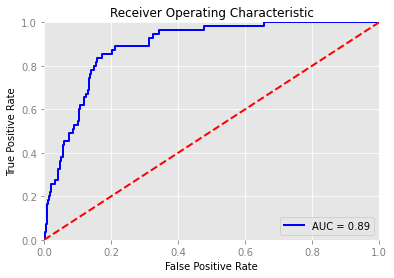

In [1294]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_train_COVID)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_COVID, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### 5.2. SVM with Grid Search

In [490]:
from sklearn import svm

In [1548]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10,100],
                'gamma': ['scale', 'auto', 1, 0.1, 0.01,0.001], 
                'kernel': ['linear', 'poly','sigmoid','rbf']}   

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_COVID, y_train_COVID)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=101),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             scoring='roc_auc')

In [1497]:
gridSVM.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [1549]:
predictions_COVID_SVM = gridSVM.predict(X_test_COVID)
predictions_train_COVID_SVM = gridSVM.predict(X_train_COVID)

In [1550]:
print(classification_report(y_test_COVID,predictions_COVID_SVM))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       171
           1       0.83      0.36      0.50        28

    accuracy                           0.90       199
   macro avg       0.87      0.67      0.72       199
weighted avg       0.89      0.90      0.88       199



In [1499]:
confusion_matrix(y_test_COVID,predictions_COVID_SVM)

array([[169,   2],
       [ 18,  10]], dtype=int64)

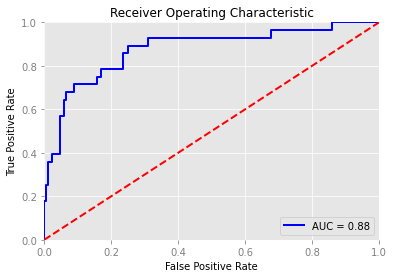

In [1551]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_COVID_SVM = gridSVM.predict_proba(X_test_COVID)
preds_COVID_SVM = probs_COVID_SVM[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds_COVID_SVM)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### 5.3. SVM with linear

In [1309]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=10, kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_COVID, y_train_COVID)

#Predict the response for test dataset
predictions_COVID_SVM = clf.predict(X_test_COVID)
predictions_train_COVID_SVM = clf.predict(X_train_COVID)

In [1310]:
print(classification_report(y_test_COVID,predictions_COVID_SVM))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       171
           1       0.83      0.36      0.50        28

    accuracy                           0.90       199
   macro avg       0.87      0.67      0.72       199
weighted avg       0.89      0.90      0.88       199



In [1311]:
confusion_matrix(y_test_COVID,predictions_COVID_SVM)

array([[169,   2],
       [ 18,  10]], dtype=int64)

In [1312]:
confusion_matrix(y_train_COVID,predictions_train_COVID_SVM)

array([[340,   9],
       [ 35,  20]], dtype=int64)

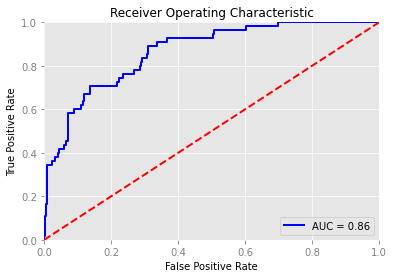

In [1314]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_train_COVID)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_COVID, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 5.4. XG Boost

In [1370]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=0, eval_metric="auc")


X_train_COVID_v2, X_val_COVID, y_train_COVID_v2, y_val_COVID = train_test_split(X_train_COVID, y_train_COVID, train_size=.8, random_state=0)

xgb_model.fit(X_train_COVID, y_train_COVID, early_stopping_rounds=10000, eval_set=[(X_train_COVID_v2,y_train_COVID_v2),(X_val_COVID,y_val_COVID)])                                                                               

[0]	validation_0-auc:0.77760	validation_1-auc:0.68151
[1]	validation_0-auc:0.84840	validation_1-auc:0.83990
[2]	validation_0-auc:0.90086	validation_1-auc:0.90839
[3]	validation_0-auc:0.90822	validation_1-auc:0.88955
[4]	validation_0-auc:0.91771	validation_1-auc:0.90325
[5]	validation_0-auc:0.92195	validation_1-auc:0.89983
[6]	validation_0-auc:0.92769	validation_1-auc:0.92038
[7]	validation_0-auc:0.93062	validation_1-auc:0.94349
[8]	validation_0-auc:0.93386	validation_1-auc:0.94863
[9]	validation_0-auc:0.93787	validation_1-auc:0.94349
[10]	validation_0-auc:0.94083	validation_1-auc:0.95034
[11]	validation_0-auc:0.94500	validation_1-auc:0.95034
[12]	validation_0-auc:0.94893	validation_1-auc:0.94863
[13]	validation_0-auc:0.95001	validation_1-auc:0.95205
[14]	validation_0-auc:0.95166	validation_1-auc:0.95034
[15]	validation_0-auc:0.95271	validation_1-auc:0.95890
[16]	validation_0-auc:0.95544	validation_1-auc:0.95719
[17]	validation_0-auc:0.96080	validation_1-auc:0.96062
[18]	validation_0-au

C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[50]	validation_0-auc:0.99368	validation_1-auc:1.00000
[51]	validation_0-auc:0.99430	validation_1-auc:1.00000
[52]	validation_0-auc:0.99568	validation_1-auc:1.00000
[53]	validation_0-auc:0.99545	validation_1-auc:1.00000
[54]	validation_0-auc:0.99584	validation_1-auc:1.00000
[55]	validation_0-auc:0.99607	validation_1-auc:1.00000
[56]	validation_0-auc:0.99669	validation_1-auc:1.00000
[57]	validation_0-auc:0.99653	validation_1-auc:1.00000
[58]	validation_0-auc:0.99784	validation_1-auc:1.00000
[59]	validation_0-auc:0.99800	validation_1-auc:1.00000
[60]	validation_0-auc:0.99815	validation_1-auc:1.00000
[61]	validation_0-auc:0.99807	validation_1-auc:1.00000
[62]	validation_0-auc:0.99792	validation_1-auc:1.00000
[63]	validation_0-auc:0.99853	validation_1-auc:1.00000
[64]	validation_0-auc:0.99869	validation_1-auc:1.00000
[65]	validation_0-auc:0.99869	validation_1-auc:1.00000
[66]	validation_0-auc:0.99908	validation_1-auc:1.00000
[67]	validation_0-auc:0.99908	validation_1-auc:1.00000
[68]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1371]:
predictions_COVID_xgb = xgb_model.predict(X_test_COVID)
predictions_train_COVID_xgb = xgb_model.predict(X_train_COVID)

In [1372]:
print(classification_report(y_test_COVID,predictions_COVID_xgb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       171
           1       0.62      0.36      0.45        28

    accuracy                           0.88       199
   macro avg       0.76      0.66      0.69       199
weighted avg       0.86      0.88      0.86       199



In [1373]:
confusion_matrix(y_test_COVID,predictions_COVID_xgb)

array([[165,   6],
       [ 18,  10]], dtype=int64)

In [1374]:
confusion_matrix(y_train_COVID,predictions_train_COVID_xgb)

array([[349,   0],
       [ 22,  33]], dtype=int64)

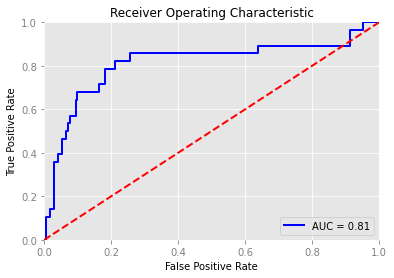

In [1377]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_model.predict_proba(X_test_COVID)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 6. Modelling - Regular Ward

#### 6.1. Logistic Regression

In [1552]:
df_regular=df[['patient_age_quantile','hematocrit_regular',
       'hemoglobin_regular', 'platelets_regular', 'mean_platelet_volume_regular', 'red_blood_cells_regular',
       'lymphocytes_regular', 'mean_corpuscular_hemoglobin_concentration_mchc_regular',
       'leukocytes_regular', 'basophils_regular', 'mean_corpuscular_hemoglobin_mch_regular',
       'eosinophils_regular', 'mean_corpuscular_volume_mcv_regular', 'monocytes_regular',
       'red_blood_cell_distribution_width_rdw_regular','Nulls','Nulls_influenza_a','Nulls_influenza_b','regular_ward']]

In [1553]:
df_test_regular=df_test[['patient_age_quantile','hematocrit_regular',
       'hemoglobin_regular', 'platelets_regular', 'mean_platelet_volume_regular', 'red_blood_cells_regular',
       'lymphocytes_regular', 'mean_corpuscular_hemoglobin_concentration_mchc_regular',
       'leukocytes_regular', 'basophils_regular', 'mean_corpuscular_hemoglobin_mch_regular',
       'eosinophils_regular', 'mean_corpuscular_volume_mcv_regular', 'monocytes_regular',
       'red_blood_cell_distribution_width_rdw_regular','Nulls','Nulls_influenza_a','Nulls_influenza_b','regular_ward']]

In [1514]:
#df_regular=df_regular.join(pd.Series(predictions_train_COVID_SVM,name='Covid_predicted',index=df_regular.index))
#df_test_regular=df_test_regular.join(pd.Series(predictions_COVID_SVM,name='Covid_predicted',index=df_test_regular.index))

In [1554]:
#X_train_regular, X_test_regular, y_train_regular, y_test_regular = train_test_split(df_regular.drop(['regular_ward'],axis=1),
#                                                   df_regular['regular_ward'], test_size=0.30, random_state=101)

X_train_regular=df_regular.drop(['regular_ward'],axis=1)
y_train_regular=df_regular['regular_ward']
    
X_test_regular=df_test_regular.drop(['regular_ward'],axis=1)
y_test_regular=df_test_regular['regular_ward']

In [1555]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_regular,y_train_regular)

LogisticRegression(class_weight='balanced')

In [1557]:
predictions_regular = logmodel.predict(X_test_regular)
predictions_train_regular = logmodel.predict(X_train_regular)

In [1525]:
print(classification_report(y_test_regular,predictions_regular))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       181
           1       0.14      0.44      0.21        18

    accuracy                           0.70       199
   macro avg       0.53      0.59      0.52       199
weighted avg       0.86      0.70      0.76       199



In [1526]:
confusion_matrix(y_test_regular,predictions_regular) #Logistic regression does not really work with regular ward

array([[132,  49],
       [ 10,   8]], dtype=int64)

In [1527]:
confusion_matrix(y_train_regular,predictions_train_regular) #very high FN error

array([[280,  85],
       [  8,  31]], dtype=int64)

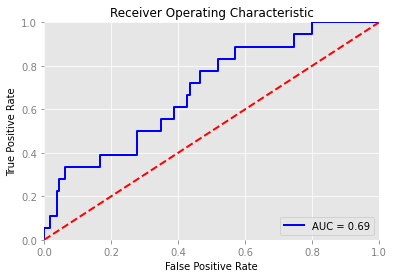

In [1558]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_regular_log = logmodel.predict_proba(X_test_regular)
preds_regular_log = probs_regular_log[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_regular, preds_regular_log)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***Conclusion:*** There are some threshold values in which the model is performing even worse than 0.5 AUC. It is not the ideal model.

#### 6.3. SVM with linear

In [1354]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=1, kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_regular, y_train_regular)

#Predict the response for test dataset
predictions_regular_SVM = clf.predict(X_test_regular)
predictions_train_regular_SVM = clf.predict(X_train_regular)

In [1355]:
print(classification_report(y_test_regular,predictions_regular_SVM))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       181
           1       0.00      0.00      0.00        18

    accuracy                           0.91       199
   macro avg       0.45      0.50      0.48       199
weighted avg       0.83      0.91      0.87       199



C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1356]:
confusion_matrix(y_test_regular,predictions_regular_SVM) #Logistic regression does not really work with regular ward

array([[181,   0],
       [ 18,   0]], dtype=int64)

In [1357]:
confusion_matrix(y_train_regular,predictions_train_regular_SVM) #Logistic regression does not really work with regular ward

array([[365,   0],
       [ 39,   0]], dtype=int64)

#### 6.2. SVM with GridSearch

In [1531]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10,100],
                'gamma': ['scale', 1, 0.1, 0.01,0.001], 
                'kernel': ['linear', 'poly','rbf']}   

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_regular, y_train_regular)


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=101),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='roc_auc')

In [1532]:
gridSVM.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [1533]:
predictions_regular_SVM = gridSVM.predict(X_test_regular)
predictions_train_regular_SVM = gridSVM.predict(X_train_regular)

In [1534]:
print(classification_report(y_test_regular,predictions_regular_SVM))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       181
           1       0.15      0.56      0.24        18

    accuracy                           0.68       199
   macro avg       0.55      0.63      0.52       199
weighted avg       0.87      0.68      0.75       199



In [1535]:
confusion_matrix(y_test_regular,predictions_regular_SVM) #Very successful in predicting 1s but high FP error

array([[126,  55],
       [  8,  10]], dtype=int64)

In [1536]:
confusion_matrix(y_train_regular,predictions_train_regular_SVM)

array([[268,  97],
       [  6,  33]], dtype=int64)

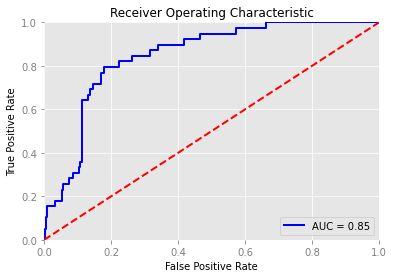

In [1539]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gridSVM.predict_proba(X_train_regular)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_regular, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 6.3. XGBoost 

In [1540]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=0, eval_metric="auc")


X_train_regular_v2, X_val_regular, y_train_regular_v2, y_val_regular = train_test_split(X_train_regular, y_train_regular, train_size=.8, random_state=0)

xgb_model.fit(X_train_regular, y_train_regular, early_stopping_rounds=10000, eval_set=[(X_train_regular_v2,y_train_regular_v2),(X_val_regular,y_val_regular)])                                                                     

[0]	validation_0-auc:0.89697	validation_1-auc:0.74573
[1]	validation_0-auc:0.93694	validation_1-auc:0.79914
[2]	validation_0-auc:0.96501	validation_1-auc:0.87393
[3]	validation_0-auc:0.97696	validation_1-auc:0.97008
[4]	validation_0-auc:0.98519	validation_1-auc:0.98718
[5]	validation_0-auc:0.99289	validation_1-auc:0.99145
[6]	validation_0-auc:0.99700	validation_1-auc:0.99145
[7]	validation_0-auc:0.99855	validation_1-auc:0.99145
[8]	validation_0-auc:0.99903	validation_1-auc:0.99573
[9]	validation_0-auc:0.99961	validation_1-auc:1.00000
[10]	validation_0-auc:0.99990	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-auc:1.00000	validation_1-auc:1.00000
[39]	validation_0-auc:1.00000	validation_1-auc:1.00000
[40]	validation_0-auc:1.00000	validation_1-auc:1.00000
[41]	validation_0-auc:1.00000	validation_1-auc:1.00000
[42]	validation_0-auc:1.00000	validation_1-auc:1.00000
[43]	validation_0-auc:1.00000	validation_1-auc:1.00000
[44]	validation_0-auc:1.00000	validation_1-auc:1.00000
[45]	validation_0-auc:1.00000	validation_1-auc:1.00000
[46]	validation_0-auc:1.00000	validation_1-auc:1.00000
[47]	validation_0-auc:1.00000	validation_1-auc:1.00000
[48]	validation_0-auc:1.00000	validation_1-auc:1.00000
[49]	validation_0-auc:1.00000	validation_1-auc:1.00000
[50]	validation_0-auc:1.00000	validation_1-auc:1.00000
[51]	validation_0-auc:1.00000	validation_1-auc:1.00000
[52]	validation_0-auc:1.00000	validation_1-auc:1.00000
[53]	validation_0-auc:1.00000	validation_1-auc:1.00000
[54]	validation_0-auc:1.00000	validation_1-auc:1.00000
[55]	validation_0-auc:1.00000	validation_1-auc:1.00000
[56]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1541]:
XGB.fit(X_train_regular,y_train_regular)

[17:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.8, gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.800000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1542]:
predictions_regular_XGB = XGB.predict(X_test_regular)
predictions_train_regular_XGB = XGB.predict(X_train_regular)

In [1543]:
confusion_matrix(y_test_regular,predictions_regular_XGB) #Does not predict any 1's

array([[177,   4],
       [ 16,   2]], dtype=int64)

In [1544]:
confusion_matrix(y_train_regular,predictions_train_regular_XGB) 

array([[364,   1],
       [ 26,  13]], dtype=int64)

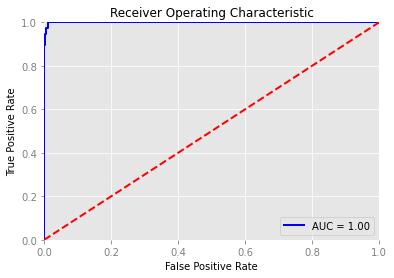

In [1546]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_model.predict_proba(X_train_regular)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_regular, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### 6.4. Logistic Regression with Grid Search

In [1386]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridgey

In [1387]:
logmodel=LogisticRegression(class_weight='balanced')


In [1388]:
logreg_cv=GridSearchCV(logmodel,grid,cv=10)

In [1389]:
logreg_cv.fit(X_train_regular,y_train_regular)


C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\AGarashzade\Anaconda3\lib\site-packa

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\AGarashzade\Anaconda3\lib\site-packa

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\AGarashzade\Anaconda3\lib\site-packa

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\AGarashzade\Anaconda3\lib\site-packa

C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AGarashzade\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [1390]:
logreg_cv.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [1391]:
predictions_regular_log_cv = logreg_cv.predict(X_test_regular)
predictions_train_regular_log_cv = logreg_cv.predict(X_train_regular)

In [1392]:
confusion_matrix(y_test_regular,predictions_regular_log_cv) 

array([[132,  49],
       [ 10,   8]], dtype=int64)

In [1393]:
confusion_matrix(y_train_regular,predictions_train_regular_log_cv) 

array([[280,  85],
       [  7,  32]], dtype=int64)

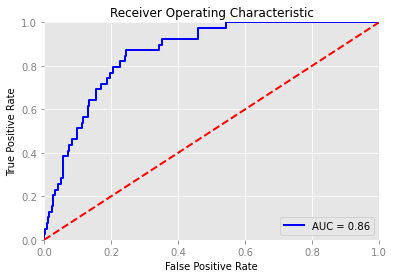

In [1395]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg_cv.predict_proba(X_train_regular)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_regular, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***Conclusion:*** All models perform fairly similar, depending on whether we want to minimize FN (best is SVM with Grid Search), or minimize FP (best is logistic regression), we can choose the best model

### 7. Modelling - semi intensive unit

#### 7.1. Logistic Regression

In [1559]:
df_semi_intensive=df[['patient_age_quantile','hematocrit_semi_intensive',
       'hemoglobin_semi_intensive', 'platelets_semi_intensive', 'mean_platelet_volume_semi_intensive', 'red_blood_cells_semi_intensive',
       'lymphocytes_semi_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_semi_intensive',
       'leukocytes_semi_intensive', 'basophils_semi_intensive', 'mean_corpuscular_hemoglobin_mch_semi_intensive',
       'eosinophils_semi_intensive', 'mean_corpuscular_volume_mcv_semi_intensive', 'monocytes_semi_intensive',
       'red_blood_cell_distribution_width_rdw_semi_intensive','Nulls','Nulls_influenza_a','Nulls_influenza_b','semi_intensive_unit']]

In [1560]:
df_test_semi_intensive=df_test[['patient_age_quantile','hematocrit_semi_intensive',
       'hemoglobin_semi_intensive', 'platelets_semi_intensive', 'mean_platelet_volume_semi_intensive', 'red_blood_cells_semi_intensive',
       'lymphocytes_semi_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_semi_intensive',
       'leukocytes_semi_intensive', 'basophils_semi_intensive', 'mean_corpuscular_hemoglobin_mch_semi_intensive',
       'eosinophils_semi_intensive', 'mean_corpuscular_volume_mcv_semi_intensive', 'monocytes_semi_intensive',
       'red_blood_cell_distribution_width_rdw_semi_intensive','Nulls','Nulls_influenza_a','Nulls_influenza_b','semi_intensive_unit']]

In [1561]:
#X_train_semi_intensive, X_test_semi_intensive, y_train_semi_intensive, y_test_semi_intensive = train_test_split(df_semi_intensive.drop(['semi_intensive_unit'],axis=1),
#                                                    df_semi_intensive['semi_intensive_unit'], test_size=0.30, 
#                                                    random_state=101)

X_train_semi_intensive=df_semi_intensive.drop(['semi_intensive_unit'],axis=1)
y_train_semi_intensive=df_semi_intensive['semi_intensive_unit']
    
X_test_semi_intensive=df_test_semi_intensive.drop(['semi_intensive_unit'],axis=1)
y_test_semi_intensive=df_test_semi_intensive['semi_intensive_unit']

In [1562]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_semi_intensive,y_train_semi_intensive)

LogisticRegression(class_weight='balanced')

In [1563]:
predictions_semi_intensive = logmodel.predict(X_test_semi_intensive)
predictions_train_semi_intensive = logmodel.predict(X_train_semi_intensive)

In [1407]:
confusion_matrix(y_test_semi_intensive,predictions_semi_intensive)

array([[123,  62],
       [  7,   7]], dtype=int64)

In [1408]:
confusion_matrix(y_train_semi_intensive,predictions_train_semi_intensive)

array([[284,  92],
       [  5,  23]], dtype=int64)

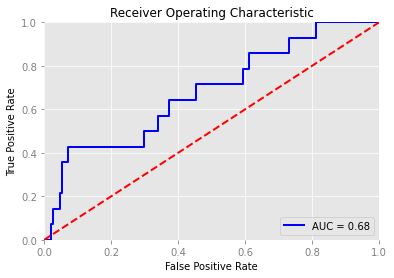

In [1410]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test_semi_intensive)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_semi_intensive, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 7.2. SVM with Grid Search

In [1564]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001], 
                'kernel': ['linear', 'poly', 'rbf','sigmoid']}   

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced',random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_semi_intensive, y_train_semi_intensive)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=101),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [1565]:
gridSVM.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [1566]:
predictions_semi_intensive = gridSVM.predict(X_test_semi_intensive)
predictions_train_semi_intensive = gridSVM.predict(X_train_semi_intensive)

In [1421]:
confusion_matrix(y_test_semi_intensive,predictions_semi_intensive)

array([[117,  68],
       [  5,   9]], dtype=int64)

In [1422]:
confusion_matrix(y_train_semi_intensive,predictions_train_semi_intensive)

array([[283,  93],
       [  7,  21]], dtype=int64)

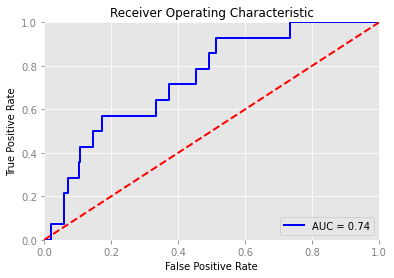

In [1567]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_semi_intensive_SVM = gridSVM.predict_proba(X_test_semi_intensive)
preds_semi_intensive_SVM = probs_semi_intensive_SVM[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_semi_intensive, preds_semi_intensive_SVM)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 7.3. XGBoost

In [1435]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=2,random_state=0, eval_metric="auc")


X_train_semi_intensive_v2, X_val_semi_intensive, y_train_semi_intensive_v2, y_val_semi_intensive = train_test_split(X_train_semi_intensive, y_train_semi_intensive, train_size=.8, random_state=0)

xgb_model.fit(X_train_semi_intensive, y_train_semi_intensive, early_stopping_rounds=10000, eval_set=[(X_train_semi_intensive_v2,y_train_semi_intensive_v2),(X_val_semi_intensive,y_val_semi_intensive)])                                                                 

[0]	validation_0-auc:0.78064	validation_1-auc:0.57562
[1]	validation_0-auc:0.85396	validation_1-auc:0.77392
[2]	validation_0-auc:0.87145	validation_1-auc:0.82022
[3]	validation_0-auc:0.88842	validation_1-auc:0.82639
[4]	validation_0-auc:0.90902	validation_1-auc:0.84336
[5]	validation_0-auc:0.92045	validation_1-auc:0.86806
[6]	validation_0-auc:0.91499	validation_1-auc:0.89275
[7]	validation_0-auc:0.92581	validation_1-auc:0.91590
[8]	validation_0-auc:0.94114	validation_1-auc:0.91435
[9]	validation_0-auc:0.94001	validation_1-auc:0.91590
[10]	validation_0-auc:0.94676	validation_1-auc:0.92361
[11]	validation_0-auc:0.94884	validation_1-auc:0.92053
[12]	validation_0-auc:0.95265	validation_1-auc:0.93056
[13]	validation_0-auc:0.95819	validation_1-auc:0.94676
[14]	validation_0-auc:0.96243	validation_1-auc:0.94907
[15]	validation_0-auc:0.96451	validation_1-auc:0.95370
[16]	validation_0-auc:0.96641	validation_1-auc:0.95370
[17]	validation_0-auc:0.96390	validation_1-auc:0.95679
[18]	validation_0-au

C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1441]:
predictions_semi_intensive_XGB = xgb_model.predict(X_test_semi_intensive)
predictions_train_semi_intensive_XGB = xgb_model.predict(X_train_semi_intensive)

In [1442]:
confusion_matrix(y_test_semi_intensive,predictions_semi_intensive_XGB)

array([[180,   5],
       [ 14,   0]], dtype=int64)

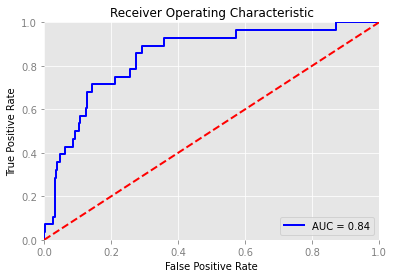

In [1440]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gridSVM.predict_proba(X_train_semi_intensive)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_semi_intensive, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 8. Modelling - Intensive care unit

#### 8.1. Logistic Regression

In [1568]:
df_intensive=df[['patient_age_quantile','hematocrit_intensive',
       'hemoglobin_intensive', 'platelets_intensive', 'mean_platelet_volume_intensive', 'red_blood_cells_intensive',
       'lymphocytes_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_intensive',
       'leukocytes_intensive', 'basophils_intensive', 'mean_corpuscular_hemoglobin_mch_intensive',
       'eosinophils_intensive', 'mean_corpuscular_volume_mcv_intensive', 'monocytes_intensive',
       'red_blood_cell_distribution_width_rdw_intensive','Nulls','Nulls_influenza_a','Nulls_influenza_b','intensive_care_unit']]

In [1569]:
df_test_intensive=df_test[['patient_age_quantile','hematocrit_intensive',
       'hemoglobin_intensive', 'platelets_intensive', 'mean_platelet_volume_intensive', 'red_blood_cells_intensive',
       'lymphocytes_intensive', 'mean_corpuscular_hemoglobin_concentration_mchc_intensive',
       'leukocytes_intensive', 'basophils_intensive', 'mean_corpuscular_hemoglobin_mch_intensive',
       'eosinophils_intensive', 'mean_corpuscular_volume_mcv_intensive', 'monocytes_intensive',
       'red_blood_cell_distribution_width_rdw_intensive','Nulls','Nulls_influenza_a','Nulls_influenza_b','intensive_care_unit']]

In [1570]:
X_train_intensive=df_intensive.drop(['intensive_care_unit'],axis=1)
y_train_intensive=df_intensive['intensive_care_unit']
    
X_test_intensive=df_test_intensive.drop(['intensive_care_unit'],axis=1)
y_test_intensive=df_test_intensive['intensive_care_unit']

In [1461]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_intensive,y_train_intensive)

LogisticRegression(class_weight='balanced')

In [1462]:
predictions_intensive = logmodel.predict(X_test_intensive)
predictions_train_intensive = logmodel.predict(X_train_intensive)

In [1463]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[166,  16],
       [ 10,   7]], dtype=int64)

In [1464]:
confusion_matrix(y_train_intensive,predictions_train_intensive)

array([[358,  34],
       [  1,  11]], dtype=int64)

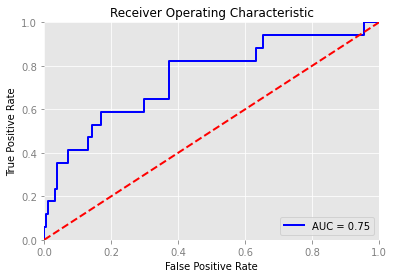

In [1467]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test_intensive)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_intensive, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 8.2. SVM with GridSearch

In [1571]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10,100],
                'gamma': ['scale', 1, 0.1, 0.01,0.001], 
                'kernel': ['linear', 'poly','sigmoid','rbf']}   

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='roc_auc') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_intensive, y_train_intensive)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=101),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             scoring='roc_auc')

In [1480]:
gridSVM.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [1481]:
predictions_intensive = gridSVM.predict(X_test_intensive)
predictions_train_intensive = gridSVM.predict(X_train_intensive)

In [1482]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[178,   4],
       [ 13,   4]], dtype=int64)

In [1483]:
confusion_matrix(y_train_intensive,predictions_train_intensive)

array([[392,   0],
       [  1,  11]], dtype=int64)

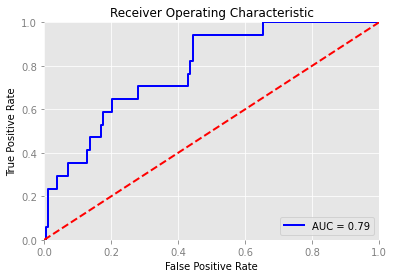

In [1572]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs_intensive_SVM = gridSVM.predict_proba(X_test_intensive)
preds_intensive_SVM = probs_intensive_SVM[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_intensive, preds_intensive_SVM)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 8.3. XGBoost

In [1486]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=2,random_state=0, eval_metric="auc")


X_train_intensive_v2, X_val_intensive, y_train_intensive_v2, y_val_intensive = train_test_split(X_train_intensive, y_train_intensive, train_size=.8, random_state=0)

xgb_model.fit(X_train_intensive, y_train_intensive, early_stopping_rounds=10000, eval_set=[(X_train_intensive_v2,y_train_intensive_v2),(X_val_intensive,y_val_intensive)])                                                                 

[0]	validation_0-auc:0.73413	validation_1-auc:0.99675
[1]	validation_0-auc:0.79425	validation_1-auc:0.99188
[2]	validation_0-auc:0.85258	validation_1-auc:1.00000
[3]	validation_0-auc:0.91627	validation_1-auc:1.00000
[4]	validation_0-auc:0.91568	validation_1-auc:1.00000
[5]	validation_0-auc:0.91607	validation_1-auc:1.00000
[6]	validation_0-auc:0.95873	validation_1-auc:1.00000
[7]	validation_0-auc:0.96667	validation_1-auc:1.00000
[8]	validation_0-auc:0.97321	validation_1-auc:1.00000
[9]	validation_0-auc:0.97242	validation_1-auc:1.00000
[10]	validation_0-auc:0.97937	validation_1-auc:1.00000
[11]	validation_0-auc:0.98214	validation_1-auc:1.00000
[12]	validation_0-auc:0.98373	validation_1-auc:1.00000
[13]	validation_0-auc:0.98353	validation_1-auc:1.00000
[14]	validation_0-auc:0.98472	validation_1-auc:1.00000
[15]	validation_0-auc:0.98730	validation_1-auc:1.00000
[16]	validation_0-auc:0.98730	validation_1-auc:1.00000
[17]	validation_0-auc:0.98809	validation_1-auc:1.00000
[18]	validation_0-au

C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-auc:1.00000	validation_1-auc:1.00000
[87]	validation_0-auc:1.00000	validation_1-auc:1.00000
[88]	validation_0-auc:1.00000	validation_1-auc:1.00000
[89]	validation_0-auc:1.00000	validation_1-auc:1.00000
[90]	validation_0-auc:1.00000	validation_1-auc:1.00000
[91]	validation_0-auc:1.00000	validation_1-auc:1.00000
[92]	validation_0-auc:1.00000	validation_1-auc:1.00000
[93]	validation_0-auc:1.00000	validation_1-auc:1.00000
[94]	validation_0-auc:1.00000	validation_1-auc:1.00000
[95]	validation_0-auc:1.00000	validation_1-auc:1.00000
[96]	validation_0-auc:1.00000	validation_1-auc:1.00000
[97]	validation_0-auc:1.00000	validation_1-auc:1.00000
[98]	validation_0-auc:1.00000	validation_1-auc:1.00000
[99]	validation_0-auc:1.00000	validation_1-auc:1.00000


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1487]:
predictions_intensive = xgb_model.predict(X_test_intensive)
predictions_train_intensive = xgb_model.predict(X_train_intensive)

In [1488]:
confusion_matrix(y_test_intensive,predictions_intensive)

array([[177,   5],
       [ 14,   3]], dtype=int64)

In [1489]:
confusion_matrix(y_train_intensive,predictions_train_intensive)

array([[392,   0],
       [  8,   4]], dtype=int64)

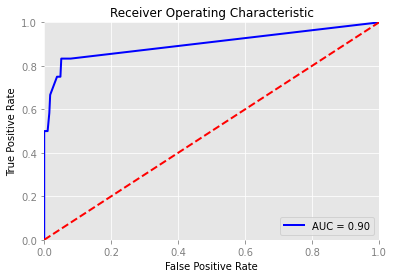

In [1493]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb_model.predict_proba(X_train_intensive)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_train_intensive, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Output

In [1578]:
output_df=pd.DataFrame(zip(df_test['Id'],preds_COVID_SVM, preds_regular_log, preds_semi_intensive_SVM,preds_intensive_SVM), index=y_test_COVID.index, 
             columns=['Id','COVID','Regular_ward','Semi_intensive_unit','Intensive_care_unit'])

In [1580]:
output_df.to_csv('output.csv',index=False)

In [1576]:
df_test

,Id,patient_age_quantile,COVID,regular_ward,semi_intensive_unit,intensive_care_unit,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,red_blood_cells_intensive,lymphocytes_intensive,mean_corpuscular_hemoglobin_concentration_mchc_intensive,leukocytes_intensive,basophils_intensive,mean_corpuscular_hemoglobin_mch_intensive,eosinophils_intensive,mean_corpuscular_volume_mcv_intensive,monocytes_intensive,red_blood_cell_distribution_width_rdw_intensive
0,693,11,0,0,0,0,1.266501,1.293436,-0.228491,-0.550290,...,0.877740,0,0.343725,-0.389586,0,0,0,0,0,-0.625073
1,5022,13,1,0,0,0,1.174947,0.980156,-0.190806,-0.438097,...,1.054043,0,-0.452899,-0.614992,0,0,0,0,0,-0.271247
2,5232,14,0,0,0,1,-0.038148,-0.210308,-0.454604,-1.560029,...,-0.285863,0,-0.652057,0.077923,0,0,1,0,1,0.082579
3,391,7,0,0,0,0,0.579844,0.290940,-0.077750,-1.223449,...,-0.021409,0,-0.950790,-0.230967,0,0,1,0,0,-0.890442
4,1280,4,0,0,0,0,0.328069,0.792188,0.060430,2.366734,...,0.154896,0,1.837398,-0.189225,0,0,0,0,0,-0.625073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,4290,19,0,0,0,0,-0.015259,-0.335620,2.999894,-0.325903,...,-0.462168,0,-1.249524,2.852366,1,0,0,0,0,-0.801985
195,2602,5,0,0,0,0,-0.473031,-0.523588,0.927195,1.020415,...,-0.215342,0,-0.353319,1.399749,0,0,0,0,0,0.259492
196,4910,13,0,0,1,0,-0.587474,-0.523588,0.550341,1.469188,...,-0.515058,1,0.144572,1.742033,1,0,0,0,1,-0.182790
197,3620,16,0,0,0,0,0.373847,0.102972,1.216117,-0.438097,...,-0.532689,0,-0.950790,-0.448025,0,0,1,0,1,-0.536617


## 5. Modelling - COVID

In [78]:
df.columns

Index(['Id', 'patient_age_quantile', 'COVID', 'regular_ward',
       'semi_intensive_unit', 'intensive_care_unit', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells',
       'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch',
       'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes',
       'red_blood_cell_distribution_width_rdw', 'respiratory_syncytial_virus',
       'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63',
       'rhinovirus_enterovirus', 'coronavirus_hku1', 'parainfluenza_3',
       'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4',
       'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009',
       'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2',
       'influenza_b_rapid_test', 'influenza_a_rapid_test', 'Nulls',
       'high_mean_platelet_volume', 'zeros', 'Nulls_influenza_a',
       'Nulls_influenza_b'

In [96]:
df['Nulls_influenza_a']=df['influenza_a_rapid_test'].apply(lambda x: 1 if pd.isna(x) else 0)
df['Nulls_influenza_b']=df['influenza_b_rapid_test'].apply(lambda x: 1 if pd.isna(x) else 0)

df_v2 = df[['patient_age_quantile','hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells',
       'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch',
       'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes',
       'red_blood_cell_distribution_width_rdw','Nulls','Nulls_influenza_a','Nulls_influenza_b','COVID','regular_ward',
       'semi_intensive_unit', 'intensive_care_unit','zeros']]

In [471]:
predictions_COVID = logmodel.predict(X_test_COVID)
predictions_train_COVID = logmodel.predict(X_train_COVID)

In [475]:
print(classification_report(y_test_COVID,predictions_COVID))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       102
           1       0.67      0.30      0.41        20

    accuracy                           0.86       122
   macro avg       0.77      0.64      0.67       122
weighted avg       0.84      0.86      0.84       122



In [477]:
confusion_matrix(y_test_COVID,predictions_COVID)

array([[99,  3],
       [14,  6]], dtype=int64)

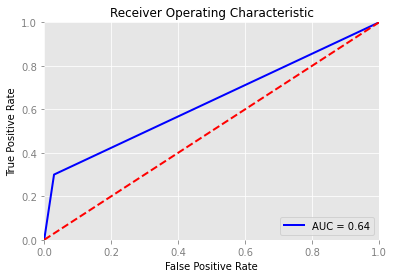

In [476]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, predictions_COVID)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 5.1. Logistic Regression

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_v2.drop(['COVID','regular_ward', 'semi_intensive_unit', 'intensive_care_unit','zeros'],axis=1),
                                                    df_v2[['COVID','regular_ward', 'semi_intensive_unit', 'intensive_care_unit','zeros']], test_size=0.30, 
                                                    random_state=101)

In [100]:
y_train_COVID=y_train['COVID']
y_test_COVID=y_test['COVID']

In [101]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train_COVID)

LogisticRegression()

In [102]:
predictions = logmodel.predict(X_test)
predictions_train = logmodel.predict(X_train)

In [103]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test_COVID,predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       102
           1       0.56      0.25      0.34        20

    accuracy                           0.84       122
   macro avg       0.71      0.61      0.63       122
weighted avg       0.82      0.84      0.82       122



In [17]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test_COVID,predictions)

array([[98,  4],
       [15,  5]], dtype=int64)

In [107]:
confusion_matrix(y_train_COVID,predictions_train) #we are not overfitting

array([[241,   6],
       [ 22,  13]], dtype=int64)

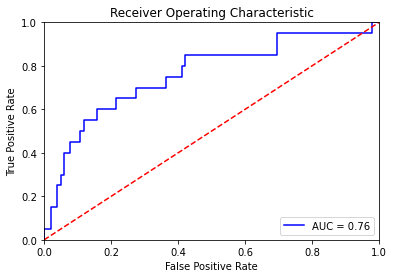

In [108]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [107]:
fpr

array([0.        , 0.        , 0.01960784, 0.01960784, 0.03921569,
       0.03921569, 0.04901961, 0.04901961, 0.05882353, 0.05882353,
       0.07843137, 0.07843137, 0.10784314, 0.10784314, 0.11764706,
       0.11764706, 0.15686275, 0.15686275, 0.21568627, 0.21568627,
       0.2745098 , 0.2745098 , 0.3627451 , 0.3627451 , 0.41176471,
       0.41176471, 0.42156863, 0.42156863, 0.69607843, 0.69607843,
       0.98039216, 0.98039216, 1.        ])

In [111]:
np.around(threshold,decimals=2)

array([1.91, 0.91, 0.78, 0.68, 0.54, 0.51, 0.46, 0.46, 0.39, 0.36, 0.31,
       0.28, 0.26, 0.25, 0.23, 0.21, 0.16, 0.16, 0.14, 0.14, 0.09, 0.08,
       0.07, 0.06, 0.05, 0.05, 0.05, 0.05, 0.02, 0.02, 0.  , 0.  , 0.  ])

C:\Users\AGarashzade\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

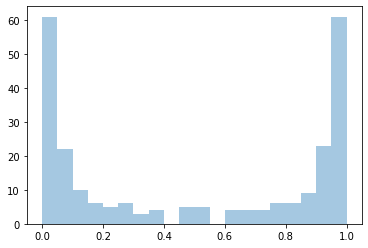

In [106]:
sns.distplot(np.around(logmodel.predict_proba(X_test),decimals=2),bins=20,kde=False)

### 5.2. SVM 

In [109]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(C=10, kernel='rbf', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train_COVID)

#Predict the response for test dataset
predictions_SVM = clf.predict(X_test)

In [111]:
print(classification_report(y_test_COVID,predictions_SVM))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       102
           1       0.67      0.20      0.31        20

    accuracy                           0.85       122
   macro avg       0.76      0.59      0.61       122
weighted avg       0.83      0.85      0.82       122



In [113]:
confusion_matrix(y_test_COVID,predictions_SVM)

array([[100,   2],
       [ 16,   4]], dtype=int64)

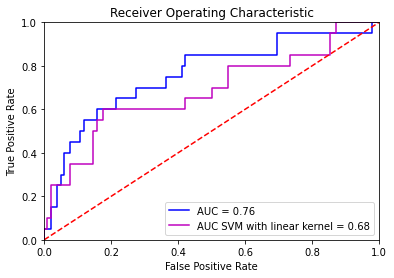

In [114]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
probs_SVM = clf.predict_proba(X_test)
preds = probs[:,1]
preds_SVM = probs_SVM[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)
fpr_SVM, tpr_SVM, threshold_SVM = metrics.roc_curve(y_test_COVID, preds_SVM)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_SVM = metrics.auc(fpr_SVM, tpr_SVM)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_SVM,tpr_SVM, 'm', label = 'AUC SVM with linear kernel = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### 5.3. SVM with Grid Search

In [24]:
#from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
#param_gridSVM = {'C': [0.1, 1, 10, 100, 1000],
#                 'shrinking':[True, False],
#                 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001], 
#                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

# Define grid instance
#gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced', random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='balanced_accuracy') 

# Initialize grid search, fitting the best model
#gridSVM.fit(X_train, y_train)

In [115]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10],
                 'shrinking':[True, False],
                 'gamma': ['scale', 'auto'], 
                 'kernel': ['linear']}  

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC(class_weight='balanced', random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='balanced_accuracy') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train, y_train_COVID)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=101),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear'], 'shrinking': [True, False]},
             scoring='balanced_accuracy')

In [116]:
print(gridSVM.best_params_)


{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


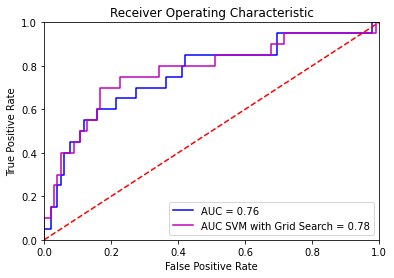

In [117]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
probs_SVM = gridSVM.predict_proba(X_test)
preds = probs[:,1]
preds_SVM = probs_SVM[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)
fpr_SVM, tpr_SVM, threshold_SVM = metrics.roc_curve(y_test_COVID, preds_SVM)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_SVM = metrics.auc(fpr_SVM, tpr_SVM)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_SVM,tpr_SVM, 'm', label = 'AUC SVM with Grid Search = %0.2f' % roc_auc_SVM)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
predictions_SVM_Grid=gridSVM.predict(X_test)
confusion_matrix(y_test_COVID, predictions_SVM_Grid)

array([[85, 17],
       [ 7, 13]], dtype=int64)

In [119]:
print(classification_report(y_test_COVID,predictions_SVM_Grid))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       102
           1       0.43      0.65      0.52        20

    accuracy                           0.80       122
   macro avg       0.68      0.74      0.70       122
weighted avg       0.84      0.80      0.82       122



### 5.4. XGBoost with small number of trees

In [121]:
from xgboost import XGBClassifier

XGB = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)


In [122]:
XGB.fit(X_train, y_train_COVID)

[19:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.8, gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.800000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

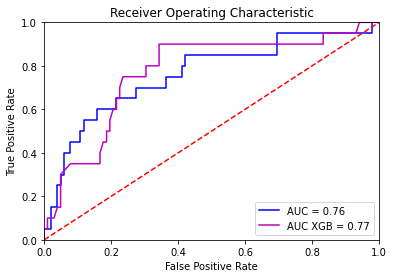

In [123]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
probs_XGB = XGB.predict_proba(X_test)
preds = probs[:,1]
preds_XGB = probs_XGB[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_COVID, preds)
fpr_XGB, tpr_XGB, threshold_XGB = metrics.roc_curve(y_test_COVID, preds_XGB)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_XGB = metrics.auc(fpr_XGB, tpr_XGB)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_XGB,tpr_XGB, 'm', label = 'AUC XGB = %0.2f' % roc_auc_XGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [125]:
predictions_XGB=XGB.predict(X_test)
predictions_XGB_train=XGB.predict(X_train)


In [126]:
confusion_matrix(y_test_COVID, predictions_XGB)

array([[100,   2],
       [ 18,   2]], dtype=int64)

In [127]:
confusion_matrix(y_train_COVID, predictions_XGB_train) ## Overfitting

array([[246,   1],
       [ 12,  23]], dtype=int64)

### Section 2. Modelling regular ward, semi intensive unit and intensive care unit

#### Step 1. Joining predicted COVID as a feature

The best model predicting COVID was SVM with Grid Search, so we will use that:

In [29]:
X_train.head()

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,Nulls,Nulls_influenza_a,Nulls_influenza_b
179,12,1.197836,1.418748,-0.165682,2.366734,1.124565,-0.381016,1.040773,0.448034,-0.223767,0.334989,-0.624811,-0.154280,-0.955614,-0.182790,1,1,1
268,15,-0.244145,-0.210308,-0.567660,0.683835,-0.444537,0.710702,0.044991,-1.346867,-0.223767,0.439533,-0.709090,0.446606,0.830284,-0.536617,0,0,0
260,18,-1.800568,-1.902020,1.103060,-1.111256,-1.925487,0.071023,-1.050367,-0.420197,-0.223767,0.230447,-0.709090,0.807138,2.012129,2.470904,0,1,1
231,12,1.152058,0.604220,-0.529975,0.010677,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,-0.456253,0.126132,0.488863,-0.890442,0,0,0
358,5,0.488289,0.416252,1.366858,-0.438097,0.754327,0.540121,-0.154166,0.164189,1.303529,-0.658171,0.386534,-0.655019,0.357547,-1.155812,1,0,0


In [135]:
y_test_pred=gridSVM.predict(X_test)
y_train_pred=gridSVM.predict(X_train)

In [151]:
X_test_v2=X_test.join(pd.Series(y_test_pred,index=X_test.index).rename('COVID_pred'))
X_train_v2=X_train.join(pd.Series(y_train_pred,index=X_train.index).rename('COVID_pred'))


#### Step 2. Predicting "zeros" 

In [152]:
y_train_zeros=y_train['zeros']
X_train_zeros=X_train_v2
y_test_zeros=y_test['zeros']
X_test_zeros=X_test_v2

In [91]:
X_test_zeros.describe()

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,Nulls,Nulls_influenza_a,Nulls_influenza_b,COVID_predict
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.00000,40.000000
mean,11.47500,0.117495,0.087308,-0.145269,-0.109932,0.181341,-0.158621,-0.064544,-0.144840,0.058783,-0.170738,-0.264519,-0.160790,0.010872,0.002968,0.325000,0.62500,0.62500,0.200000
std,5.54232,0.829516,0.792765,0.744530,1.040557,0.868603,0.988387,0.925870,0.726904,0.798902,1.085180,0.770477,1.032474,1.182304,0.827326,0.474342,0.49029,0.49029,0.405096
min,0.00000,-1.342796,-1.338116,-1.936897,-2.008802,-1.590510,-1.549495,-2.743197,-1.477658,-1.140144,-2.801307,-0.835508,-2.337502,-2.058669,-0.978899,0.000000,0.00000,0.00000,0.000000
25%,7.00000,-0.501641,-0.413940,-0.630469,-0.802725,-0.281456,-0.978049,-0.577371,-0.598296,-0.529226,-0.945665,-0.709090,-0.715108,-0.640455,-0.558731,0.000000,0.00000,0.00000,0.000000
50%,13.00000,0.133517,0.071644,-0.322705,-0.157614,0.093189,-0.359693,-0.054585,-0.317234,-0.223767,0.021360,-0.561602,-0.104207,-0.285902,-0.050106,0.000000,1.00000,1.00000,0.000000
75%,16.00000,0.579844,0.619884,0.368195,0.459449,0.529540,0.582766,0.468200,0.255326,0.463516,0.583280,-0.182347,0.506695,0.364112,0.193150,1.000000,1.00000,1.00000,0.000000
max,19.00000,2.433818,1.669372,1.203555,1.917961,3.645706,1.691542,1.538664,1.945176,1.914447,1.694052,2.029970,1.828645,3.640448,3.267013,1.000000,1.00000,1.00000,1.000000


In [154]:
logmodel.fit(X_train_zeros, y_train_zeros)

LogisticRegression()

In [159]:
pred_zeros=logmodel.predict(X_test_zeros)
pred_zeros_train=logmodel.predict(X_train_zeros)

In [156]:
print(classification_report(y_test_zeros,pred_zeros)) #accuracy of logistic regression is not high enough

              precision    recall  f1-score   support

           0       0.56      0.19      0.28        27
           1       0.81      0.96      0.88        95

    accuracy                           0.79       122
   macro avg       0.68      0.57      0.58       122
weighted avg       0.75      0.79      0.74       122



In [160]:
confusion_matrix(y_train_zeros,pred_zeros_train)

array([[ 19,  33],
       [  5, 225]], dtype=int64)

In [161]:
confusion_matrix(y_test_zeros,pred_zeros)

array([[ 5, 22],
       [ 4, 91]], dtype=int64)

In [166]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range to grid search
param_gridSVM = {'C': [0.1, 1, 10],
                'shrinking':[True, False],
                 'gamma': ['scale', 'auto'], 
                   'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Define grid instance
gridSVM = GridSearchCV(cv=5, estimator=svm.SVC( random_state=101,probability=True), param_grid=param_gridSVM, refit = True, verbose = 0, scoring='accuracy') 

# Initialize grid search, fitting the best model
gridSVM.fit(X_train_zeros, y_train_zeros)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=101),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             scoring='accuracy')

In [167]:
print(gridSVM.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}


In [168]:
pred_zeros_SVM=gridSVM.predict(X_test_zeros)
pred_zeros_train_SVM=gridSVM.predict(X_train_zeros)

In [169]:
print(classification_report(y_test_zeros,pred_zeros_SVM)) #accuracy of logistic regression is not high enough

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        27
           1       0.78      0.98      0.87        95

    accuracy                           0.77       122
   macro avg       0.56      0.51      0.47       122
weighted avg       0.68      0.77      0.69       122



In [170]:
confusion_matrix(y_test_zeros,pred_zeros_SVM)

array([[ 1, 26],
       [ 2, 93]], dtype=int64)

In [171]:
XGB.fit(X_train_zeros, y_train_zeros)

[23:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AGarashzade\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.8, gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.800000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
pred_zeros_XGB=XGB.predict(X_test_zeros)
pred_zeros_train_XGB=XGB.predict(X_train_zeros)

In [174]:
print(classification_report(y_train_zeros,pred_zeros_train_XGB)) #accuracy of logistic regression is not high enough

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        52
           1       0.93      0.99      0.96       230

    accuracy                           0.93       282
   macro avg       0.93      0.84      0.88       282
weighted avg       0.93      0.93      0.93       282

